# Data Understanding

The dataset imported from our data warehouse “DW_COCACOLA” contains financial metrics related to Coca Cola’s stock exchange spanning from September 30, 2009, to September 30, 2023. The data is reported at quarterly intervals. This dataset provides valuable insights into the company's financial structure, including its borrowing, equity, and the relationship between these two important aspects.

### Insights

- **Date** 
- **Long Term Debt:** Total long-term financial obligations.(doyounn)
- **Shareholder's Equity:** Ownership value in the company.(marabi7 mta3 charika saffi)
- **Debt to Equity Ratio:** Debt compared to equity proportion. (rapport mabin doyoun w rib7 saffi)
- **TTM Net Income:** Recent 12-month earnings. (marabi7 ba3d mana7ina dyoun)
- **LT Investments & Debt:** Long-term assets and debts.(!investment-debt=bech ta3rif 9a3da t7afidh 3al iltizemet meliya ou non)
- **Return on Investment (ROI):** Investment profitability.(nouvelle valeur action /valeur action initiale *100) 
- **Dividend Payout:** Earnings paid as dividends (%).(7a9 koll investisser)
- **Stock Price:** Share market price. (prix action fil marche)
- **Dividend Yield:** Dividend income as a percentage. (pourcentage 7a9 investisseur )

### Connection with DataWrehouse : 

In [1]:
import pyodbc
import pandas as pd

# Obtenez la liste des pilotes ODBC installés
drivers = [driver for driver in pyodbc.drivers()]

# Affichez la liste des pilotes
for driver in drivers:
    print(driver)

SQL Server
Microsoft Access Driver (*.mdb, *.accdb)
Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)
Microsoft Access Text Driver (*.txt, *.csv)
SQL Server Native Client 11.0


In [2]:
import pyodbc
import sqlalchemy as sa
import pandas as pd
import warnings

# Connection details
server = 'LAPTOP-A0T9LGC9'
database = 'DW_COCACOLA'
username = ''
password = ''

# Connection string
connection_string = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'
conn = pyodbc.connect(connection_string)

# Ignore specific warning by category
warnings.filterwarnings("ignore")

# Get the list of installed ODBC drivers
drivers = [driver for driver in pyodbc.drivers()]

# Display the list of drivers
for driver in drivers:
    print(driver)

SQL Server
Microsoft Access Driver (*.mdb, *.accdb)
Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)
Microsoft Access Text Driver (*.txt, *.csv)
SQL Server Native Client 11.0


In [3]:
sql_query = 'SELECT * FROM DividendDWW'
Dividend = pd.read_sql(sql_query, conn)
Dividend

,date,LongTermDebt,ShEquity,DebtEquityRatio,TTMNetIncome,LTInvDebt,ReturnOnInv,investors_fk
0,2009-03-31,22.000000,21.110001,1.04,9.50,41.200001,0.2997,1
1,2009-06-30,22.540001,23.520000,0.96,8.30,31.700001,0.2889,2
2,2009-09-30,22.690001,24.420000,0.93,8.20,30.510000,0.2870,3
3,2009-12-31,23.330000,25.350000,0.92,8.23,30.410000,0.2788,4
4,2010-03-31,22.250000,25.160000,0.88,8.55,29.580000,0.2900,5
...,...,...,...,...,...,...,...,...
349,2022-09-30,68.040001,24.440001,2.78,10.51,59.900002,0.1692,173
350,2022-12-31,66.940002,25.830000,2.59,10.91,62.200001,0.1763,174
351,2023-03-31,70.540001,26.870001,2.63,10.87,63.000000,0.1763,175
352,2023-06-30,70.900002,27.549999,2.57,10.93,63.180000,0.1761,176


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exporting new Data from Excel : 
Through effective web scraping, we have acquired essential datasets that are integral to our data analysis. These datasets serve as a foundational resource for obtaining profound insights and enhancing our understanding of the subject matter. By harnessing the information collected through web scraping, we are well-prepared to undertake a comprehensive and informative analysis, which will lead to a deeper understanding of the data and its underlying patterns

In [5]:
# Charger le fichier Excel dans un DataFrame
df = pd.read_csv('D:/Desktop/les datasets projet/New folder/dividend.csv', header=0)
df

,Date,Dividend Payout,Stock Price,Dividend Yield
0,6/11/1963,0.00,0.05,0.32
1,9/11/1963,0.00,0.05,0.29
2,11/26/1963,0.00,0.06,0.28
3,3/10/1964,0.00,0.07,0.25
4,6/9/1964,0.00,0.07,0.27
...,...,...,...,...
193,3/13/2012,0.66,24.55,2.70
194,6/13/2012,0.68,26.28,2.60
195,9/12/2012,0.71,26.61,2.65
196,11/28/2012,0.73,26.79,2.71


## Merging Data

In [6]:
import pandas as pd

# Assuming you've already loaded Dividend and Df dataframes

# Convert 'Date' columns to datetime objects
Dividend['date'] = pd.to_datetime(Dividend['date'])
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the 'Date' column
Dividend['Year'] = Dividend['date'].dt.year
df['Year'] = df['Date'].dt.year

# Merge based on the 'Year' column
merged_df = pd.merge(Dividend, df, on='Year', how='inner')
merged_df

,date,LongTermDebt,ShEquity,DebtEquityRatio,TTMNetIncome,LTInvDebt,ReturnOnInv,investors_fk,Year,Date,Dividend Payout,Stock Price,Dividend Yield
0,2009-03-31,22.000000,21.110001,1.04,9.50,41.200001,0.2997,1,2009,2009-03-11,0.49,12.64,3.87
1,2009-03-31,22.000000,21.110001,1.04,9.50,41.200001,0.2997,1,2009,2009-06-11,0.50,15.65,3.21
2,2009-03-31,22.000000,21.110001,1.04,9.50,41.200001,0.2997,1,2009,2009-09-11,0.52,16.72,3.09
3,2009-03-31,22.000000,21.110001,1.04,9.50,41.200001,0.2997,1,2009,2009-11-27,0.53,18.70,2.84
4,2009-06-30,22.540001,23.520000,0.96,8.30,31.700001,0.2889,2,2009,2009-03-11,0.49,12.64,3.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,2013-12-31,56.619999,33.439999,1.69,10.23,52.590000,0.2117,79,2013,2013-03-13,0.75,27.73,2.71
404,2013-03-31,55.560001,32.889999,1.69,10.68,47.189999,0.2203,135,2013,2013-03-13,0.75,27.73,2.71
405,2013-06-30,56.880001,32.630001,1.74,10.63,46.810001,0.2218,136,2013,2013-03-13,0.75,27.73,2.71
406,2013-09-30,56.970001,32.470001,1.76,10.31,46.639999,0.2187,137,2013,2013-03-13,0.75,27.73,2.71


In [7]:
merged_df.head()

,date,LongTermDebt,ShEquity,DebtEquityRatio,TTMNetIncome,LTInvDebt,ReturnOnInv,investors_fk,Year,Date,Dividend Payout,Stock Price,Dividend Yield
0,2009-03-31,22.000000,21.110001,1.04,9.5,41.200001,0.2997,1,2009,2009-03-11,0.49,12.64,3.87
1,2009-03-31,22.000000,21.110001,1.04,9.5,41.200001,0.2997,1,2009,2009-06-11,0.50,15.65,3.21
2,2009-03-31,22.000000,21.110001,1.04,9.5,41.200001,0.2997,1,2009,2009-09-11,0.52,16.72,3.09
3,2009-03-31,22.000000,21.110001,1.04,9.5,41.200001,0.2997,1,2009,2009-11-27,0.53,18.70,2.84
4,2009-06-30,22.540001,23.520000,0.96,8.3,31.700001,0.2889,2,2009,2009-03-11,0.49,12.64,3.87


In [8]:
merged_df.tail()

,date,LongTermDebt,ShEquity,DebtEquityRatio,TTMNetIncome,LTInvDebt,ReturnOnInv,investors_fk,Year,Date,Dividend Payout,Stock Price,Dividend Yield
403,2013-12-31,56.619999,33.439999,1.69,10.23,52.590000,0.2117,79,2013,2013-03-13,0.75,27.73,2.71
404,2013-03-31,55.560001,32.889999,1.69,10.68,47.189999,0.2203,135,2013,2013-03-13,0.75,27.73,2.71
405,2013-06-30,56.880001,32.630001,1.74,10.63,46.810001,0.2218,136,2013,2013-03-13,0.75,27.73,2.71
406,2013-09-30,56.970001,32.470001,1.76,10.31,46.639999,0.2187,137,2013,2013-03-13,0.75,27.73,2.71
407,2013-12-31,56.619999,33.439999,1.69,10.23,52.590000,0.2117,138,2013,2013-03-13,0.75,27.73,2.71


In [9]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
LongTermDebt,408.0,38.420441,13.371592,22.000000,22.690001,43.459999,50.680000,56.970001
ShEquity,408.0,29.635147,4.330874,21.110001,25.350000,31.920000,33.182499,35.419998
DebtEquityRatio,408.0,1.261176,0.297203,0.880000,0.930000,1.330000,1.530000,1.760000
TTMNetIncome,408.0,9.340735,0.917855,8.200000,8.510000,9.070000,10.400000,10.780000
LTInvDebt,408.0,40.415147,8.219453,29.580000,31.320000,45.279999,47.382500,52.590000
ReturnOnInv,408.0,0.253849,0.033823,0.211700,0.219700,0.244100,0.288900,0.299700
investors_fk,408.0,68.088235,48.497849,1.000000,13.000000,68.000000,123.000000,138.000000
Year,408.0,2010.647059,1.235408,2009.000000,2010.000000,2011.000000,2012.000000,2013.000000
Dividend Payout,408.0,0.607647,0.078276,0.490000,0.540000,0.600000,0.660000,0.750000
Stock Price,408.0,21.318235,4.302748,12.640000,17.670000,22.020000,24.550000,27.730000


In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 0 to 407
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             408 non-null    datetime64[ns]
 1   LongTermDebt     408 non-null    float64       
 2   ShEquity         408 non-null    float64       
 3   DebtEquityRatio  408 non-null    float64       
 4   TTMNetIncome     408 non-null    float64       
 5   LTInvDebt        408 non-null    float64       
 6   ReturnOnInv      408 non-null    float64       
 7   investors_fk     408 non-null    int64         
 8   Year             408 non-null    int64         
 9   Date             408 non-null    datetime64[ns]
 10  Dividend Payout  408 non-null    float64       
 11  Stock Price      408 non-null    float64       
 12  Dividend Yield   408 non-null    float64       
dtypes: datetime64[ns](2), float64(9), int64(2)
memory usage: 44.6 KB


In [11]:
merged_df.index.min()

0

In [12]:
merged_df.index.max()

407

# Data preparation 

## Feature Selection

In [13]:
# Drop the "investors_fk" column
merged_df = merged_df.drop("investors_fk", axis=1)

## Searching for Null Values

In [14]:
merged_df.isnull().values.any()

False

In [15]:
merged_df.isnull().sum()

date               0
LongTermDebt       0
ShEquity           0
DebtEquityRatio    0
TTMNetIncome       0
LTInvDebt          0
ReturnOnInv        0
Year               0
Date               0
Dividend Payout    0
Stock Price        0
Dividend Yield     0
dtype: int64

## Searching for duplicated values

In [16]:
duplicate_rows = merged_df.duplicated()
duplicate_rows

0      False
1      False
2      False
3      False
4      False
       ...  
403     True
404     True
405     True
406     True
407     True
Length: 408, dtype: bool

In [17]:
duplicate_rows_nb = merged_df.duplicated().sum()
duplicate_rows_nb
merged_df = merged_df.drop_duplicates()
duplicate_rows_nb = merged_df.duplicated().sum()
duplicate_rows_nb

0

In [18]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 387
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             68 non-null     datetime64[ns]
 1   LongTermDebt     68 non-null     float64       
 2   ShEquity         68 non-null     float64       
 3   DebtEquityRatio  68 non-null     float64       
 4   TTMNetIncome     68 non-null     float64       
 5   LTInvDebt        68 non-null     float64       
 6   ReturnOnInv      68 non-null     float64       
 7   Year             68 non-null     int64         
 8   Date             68 non-null     datetime64[ns]
 9   Dividend Payout  68 non-null     float64       
 10  Stock Price      68 non-null     float64       
 11  Dividend Yield   68 non-null     float64       
dtypes: datetime64[ns](2), float64(9), int64(1)
memory usage: 6.9 KB


## Searching for Outliers

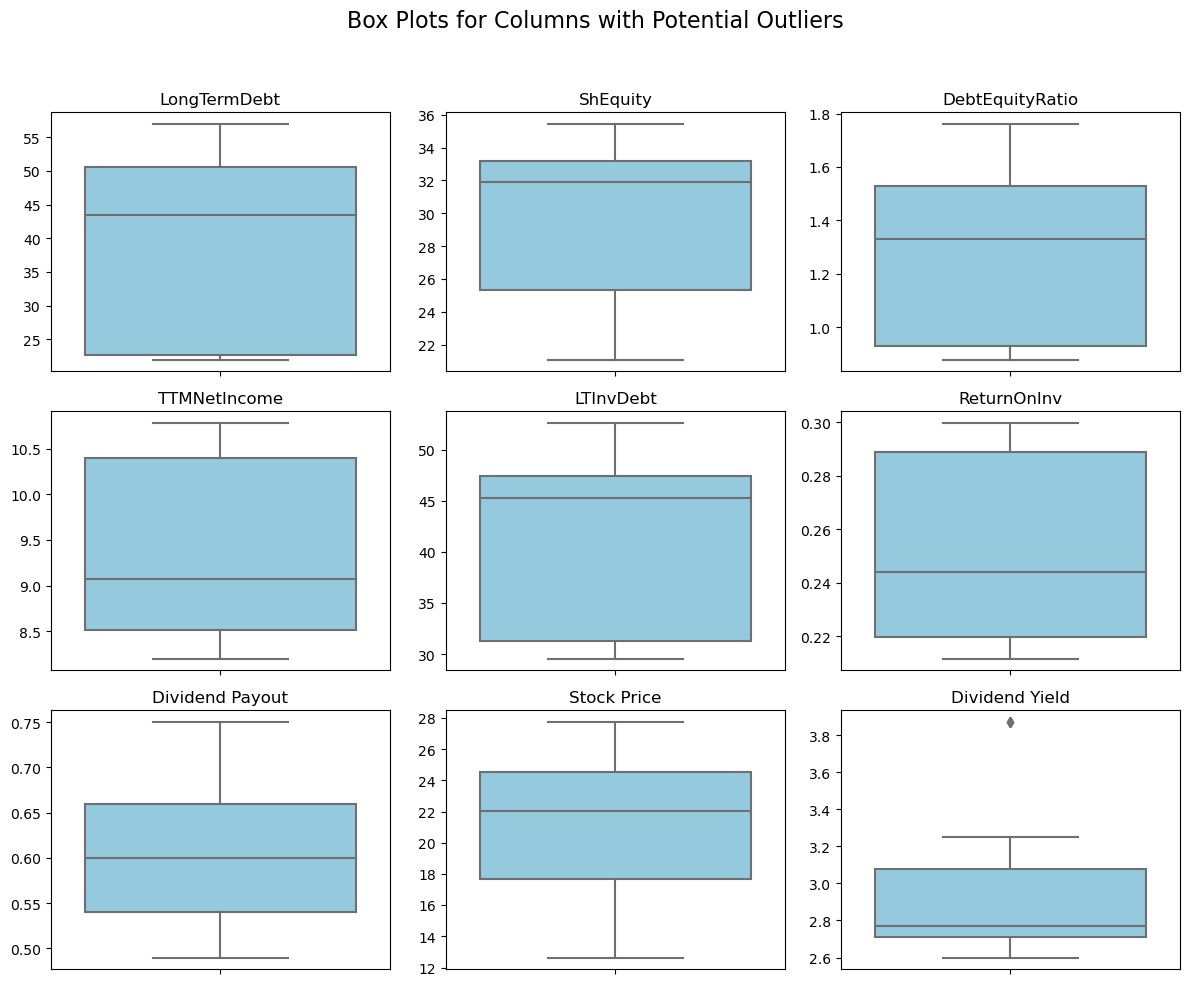

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'merged_df' is your DataFrame containing the columns

# Define the columns with potential outliers
columns_with_outliers = ['LongTermDebt', 'ShEquity', 'DebtEquityRatio', 'TTMNetIncome', 'LTInvDebt', 'ReturnOnInv',
                         'Dividend Payout', 'Stock Price', 'Dividend Yield']

# Create subplots for each column
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
fig.suptitle('Box Plots for Columns with Potential Outliers', fontsize=16)

# Create box plots for each column
for i, column in enumerate(columns_with_outliers):
    sns.boxplot(data=merged_df, y=column, ax=axes[i // 3, i % 3], color='skyblue')
    axes[i // 3, i % 3].set_title(column)
    axes[i // 3, i % 3].set_ylabel('')
    axes[i // 3, i % 3].set_xlabel('')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()

The box plots show that there is some variation in the data for all nine columns. However, the central 50% of the data is relatively tightly clustered for most columns. There are a few outliers in the Dividend Yield column.

In [20]:
#replacing outliers in the'DIVIDEND YIELD' column
import pandas as pd

# Assuming merged_df is your DataFrame and you want to handle outliers in 'Dividend Yield'
columns_with_outliers = ['Dividend Yield']

for column in columns_with_outliers:
    Q1 = merged_df[column].quantile(0.25)
    Q3 = merged_df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    high_outliers = merged_df[merged_df[column] > upper_bound]
    low_outliers = merged_df[merged_df[column] < lower_bound]

    max_non_outlier = merged_df[(merged_df[column] >= lower_bound) & (merged_df[column] <= upper_bound)][column].max()
    min_non_outlier = merged_df[(merged_df[column] >= lower_bound) & (merged_df[column] <= upper_bound)][column].min()

    merged_df.loc[high_outliers.index, column] = max_non_outlier
    merged_df.loc[low_outliers.index, column] = min_non_outlier

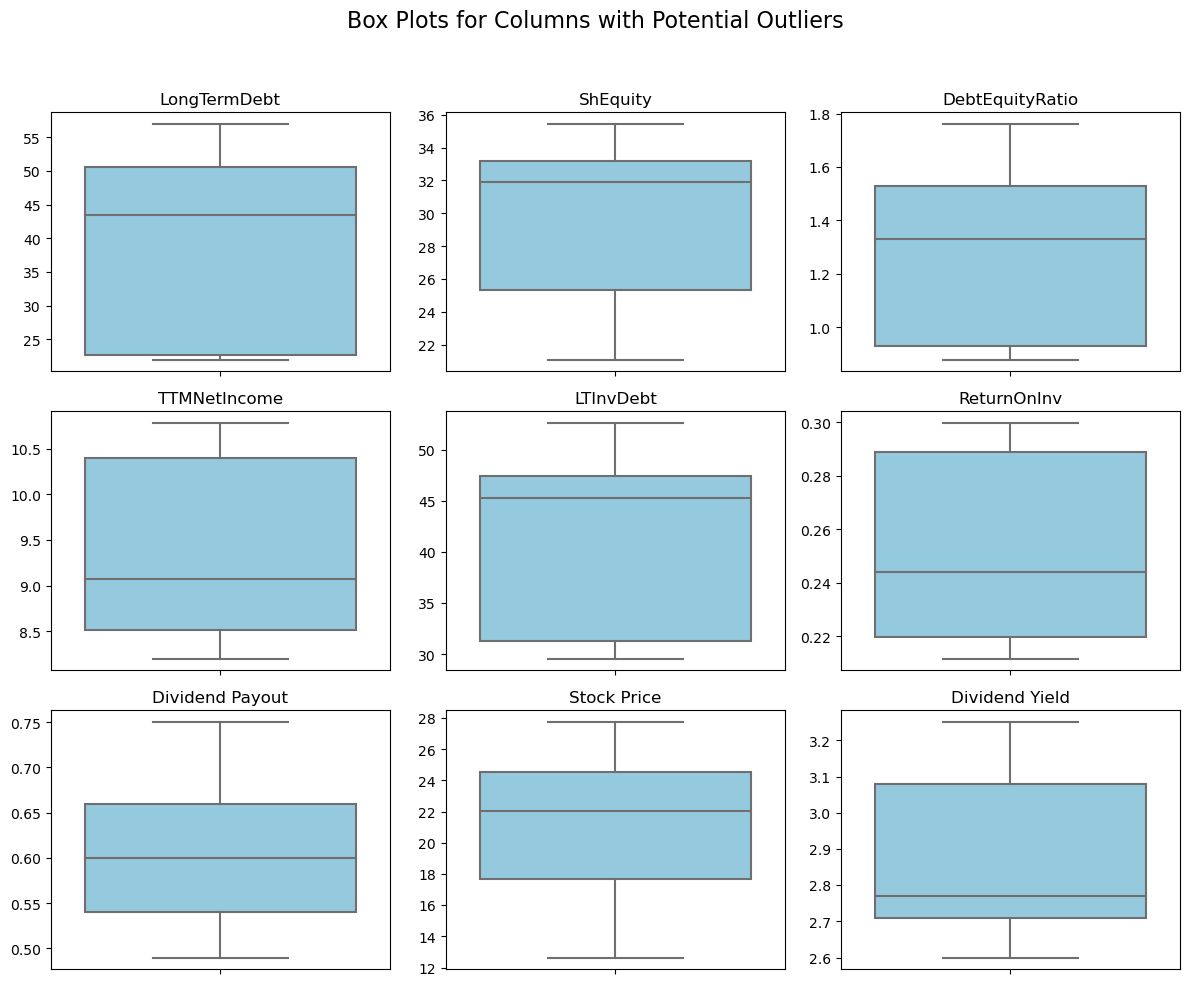

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'merged_df' is your DataFrame containing the columns

# Define the columns with potential outliers
columns_with_outliers = ['LongTermDebt', 'ShEquity', 'DebtEquityRatio', 'TTMNetIncome', 'LTInvDebt', 'ReturnOnInv',
                         'Dividend Payout', 'Stock Price', 'Dividend Yield']

# Create subplots for each column
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
fig.suptitle('Box Plots for Columns with Potential Outliers', fontsize=16)

# Create box plots for each column
for i, column in enumerate(columns_with_outliers):
    sns.boxplot(data=merged_df, y=column, ax=axes[i // 3, i % 3], color='skyblue')
    axes[i // 3, i % 3].set_title(column)
    axes[i // 3, i % 3].set_ylabel('')
    axes[i // 3, i % 3].set_xlabel('')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()

## converting DataFrame into excel file

In [22]:
# Assuming your DataFrame is named merged_Df
# Save DataFrame to an Excel file
merged_df.to_excel('D:/Desktop\les datasets projet/merged66.xlsx', index=False) 


# Data Visualisation : 


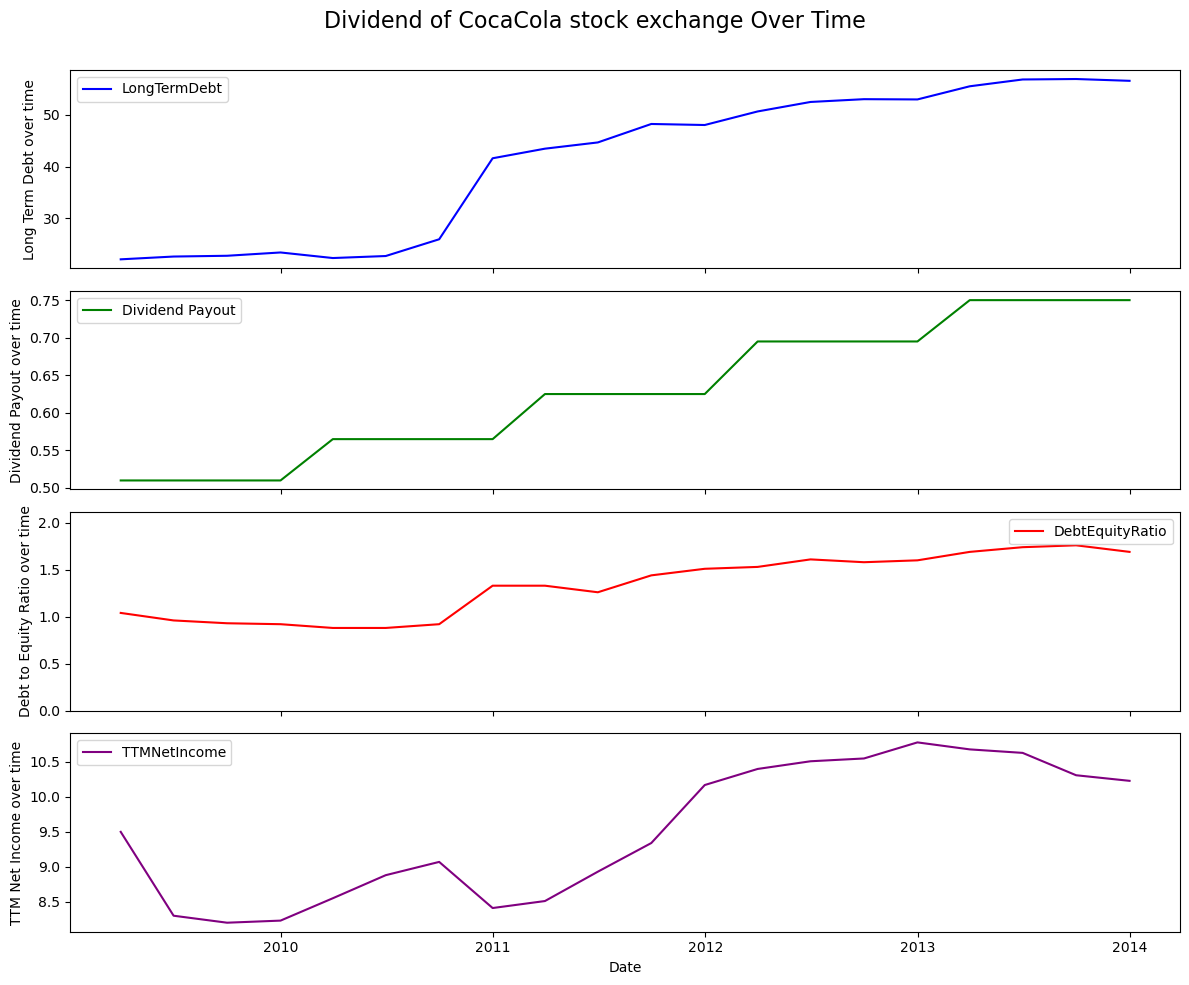

In [23]:
#Grouping by date and aggregating the values using a method like mean() or sum() will ensure 
#that you have a single value for each date, reducing the possibility of multiple lines for the same date in your visualization
import matplotlib.pyplot as plt

# Group by date and aggregate values (using mean, sum, or any desired method)
grouped_df = merged_df.groupby('date').mean().reset_index()  # You can use different aggregation methods

# Plotting
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 10), sharex=True)

# Plot Long Term Debt over time
axes[0].plot(grouped_df['date'], grouped_df['LongTermDebt'], label='LongTermDebt', color='blue')
axes[0].set_ylabel('Long Term Debt over time')
axes[0].legend()

# Plot Dividend Payout over time
axes[1].plot(grouped_df['date'], grouped_df['Dividend Payout'], label='Dividend Payout', color='green')
axes[1].set_ylabel('Dividend Payout over time')
axes[1].legend()

# Plot Debt to Equity Ratio over time
axes[2].plot(grouped_df['date'], grouped_df['DebtEquityRatio'], label='DebtEquityRatio', color='red')
axes[2].set_ylabel('Debt to Equity Ratio over time')
axes[2].set_ylim(0, grouped_df['DebtEquityRatio'].max() * 1.2)  # Adjust the y-axis scale to emphasize variation
axes[2].legend()

# Plot TTM Net Income over time
axes[3].plot(grouped_df['date'], grouped_df['TTMNetIncome'], label='TTMNetIncome', color='purple')
axes[3].set_ylabel('TTM Net Income over time')
axes[3].legend()

# Set the common title for all subplots
plt.suptitle('Dividend of CocaCola stock exchange Over Time', fontsize=16)
plt.xlabel('Date')

# Adjust subplot spacing
plt.tight_layout()
plt.subplots_adjust(top=0.92)

# Show the plot
plt.show()

**Long-Term Debt:** it is caused by expansion and acquisitions.Itcan be a risk for the company, as it increases interest payments. However, Coca-Cola has a strong financial health and is able to manage its debt.

**Dividend Payout:** It's a positive sign for investors, as it means the company is able to share its profits with its shareholders.Making it a good value for investors seeking dividend income.

**Debt to Equity Ratio:** Coca-Cola's debt to equity ratio is relatively stable, which indicates that the company has a strong financial health.A high debt to equity ratio can be a sign of risk for the company, as it means it is more indebted than its equity.

**TTM Net Income:** It's a positive sign for the company, as it means it is profitable and generating growing revenue.
Coca-Cola is a global leader in the beverage industry, which gives it a strong position to continue generating profits in the future.

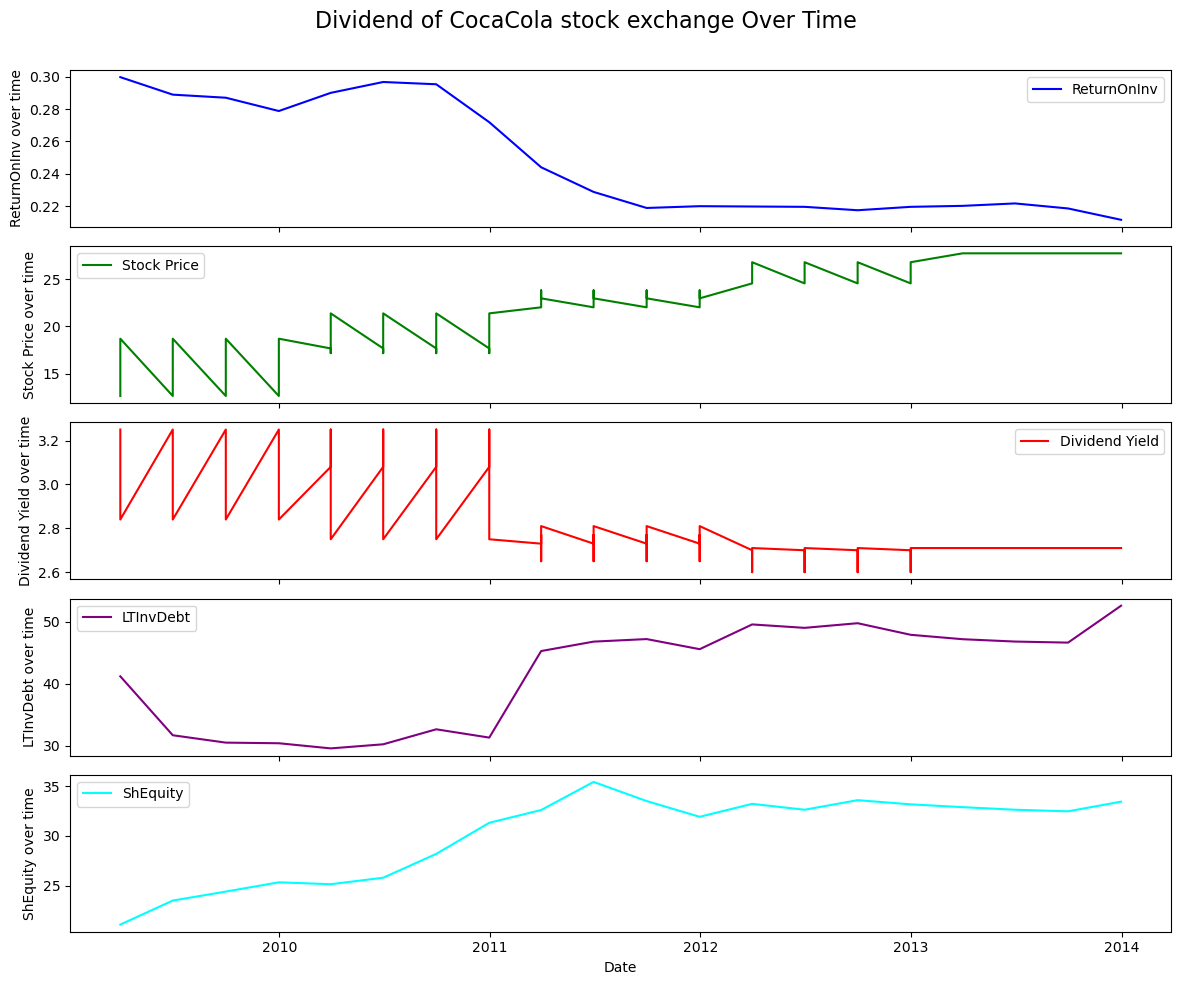

In [24]:
import matplotlib.pyplot as plt

# Create subplots with shared x-axis
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 10), sharex=True)


# Plot Low price
axes[0].plot(merged_df['date'], merged_df['ReturnOnInv'], label='ReturnOnInv', color='blue')
axes[0].set_ylabel('ReturnOnInv over time')
axes[0].legend()

# Plot Low price
axes[1].plot(merged_df['date'], merged_df['Stock Price'], label='Stock Price', color='green')
axes[1].set_ylabel('Stock Price over time')
axes[1].legend()

# Plot Low price
axes[2].plot(merged_df['date'], merged_df['Dividend Yield'], label='Dividend Yield', color='red')
axes[2].set_ylabel('Dividend Yield over time')
axes[2].legend()

# Plot Low price
axes[3].plot(merged_df['date'], merged_df['LTInvDebt'], label='LTInvDebt', color='purple')
axes[3].set_ylabel('LTInvDebt over time')
axes[3].legend()

# Plot Low price
axes[4].plot(merged_df['date'], merged_df['ShEquity'], label='ShEquity', color='cyan')
axes[4].set_ylabel('ShEquity over time')
axes[4].legend()


# Set the common title for all subplots
plt.suptitle('Dividend of CocaCola stock exchange Over Time', fontsize=16)
plt.xlabel('Date')

# Adjust subplot spacing
plt.tight_layout()
plt.subplots_adjust(top=0.92)

# Show the plot
plt.show()

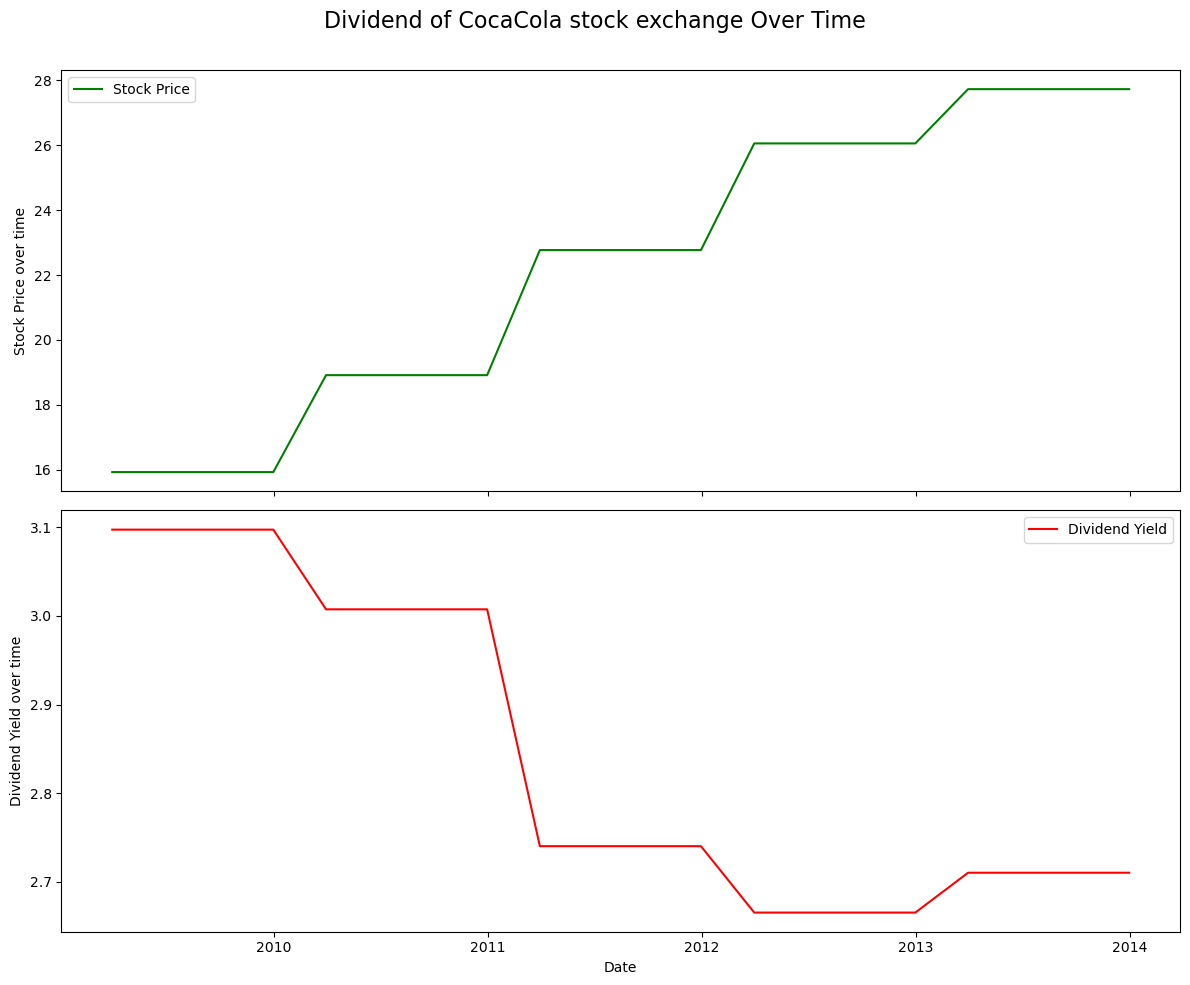

In [25]:
#Grouping by date and aggregating the values using a method like mean() or sum() will ensure 
#that you have a single value for each date, reducing the possibility of multiple lines for the same date in your visualization
import matplotlib.pyplot as plt

# Group by date and aggregate values (using mean, sum, or any desired method)
grouped_df = merged_df.groupby('date').mean().reset_index()  # You can use different aggregation methods

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

# Plot Long Term Debt over time
axes[0].plot(grouped_df['date'], grouped_df['Stock Price'], label='Stock Price', color='green')
axes[0].set_ylabel('Stock Price over time')
axes[0].legend()

# Plot Dividend Payout over time
axes[1].plot(grouped_df['date'], grouped_df['Dividend Yield'], label='Dividend Yield', color='red')
axes[1].set_ylabel('Dividend Yield over time')
axes[1].legend()


# Set the common title for all subplots
plt.suptitle('Dividend of CocaCola stock exchange Over Time', fontsize=16)
plt.xlabel('Date')

# Adjust subplot spacing
plt.tight_layout()
plt.subplots_adjust(top=0.92)

# Show the plot
plt.show()

**ReturnOnInv:** This suggests that the company was profiting until it had decrease of the return to investors.

**Stock Price:** Investors are becoming more confident in the company's future prospects , willing to pay more for its shares.

**Dividend Yield:** The company is paying out a smaller percentage of its earnings as dividends.

**LTInvDebt:** The company is reducing its long-term debt, which is a positive sign.

**ShEquity:** The company is becoming more financially sound, with more assets and less debt.

# Data Correlation

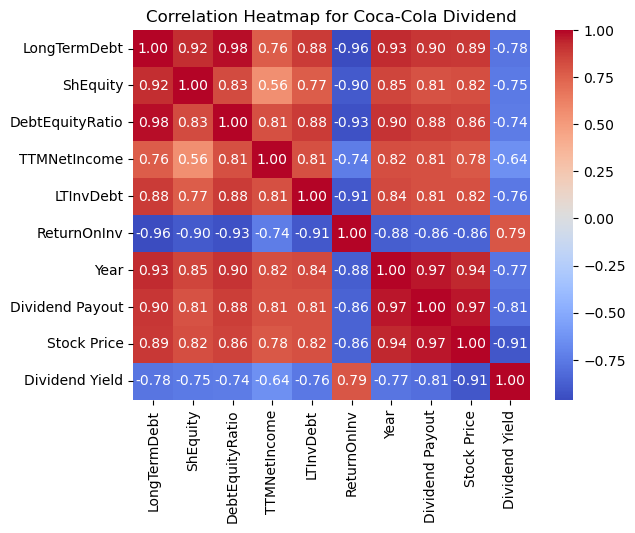

In [26]:
numerical_columns = merged_df.select_dtypes(include=['number'])
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Coca-Cola Dividend')
plt.show()


**Strongly Correlated:** Return on investment (ROI) and Stock price (0.81)

Dividend yield and Stock price (0.78)

Long-term investment and debt (LTInvDebt) and Shareholder equity (ShEquity) (0.92)

**Weakly Correlated:** Dividend yield and ROI (0.22)

ROI and LTInvDebt (0.17)

Stock price and LTInvDebt (0.16)

Dividend yield and ShEquity (0.09)

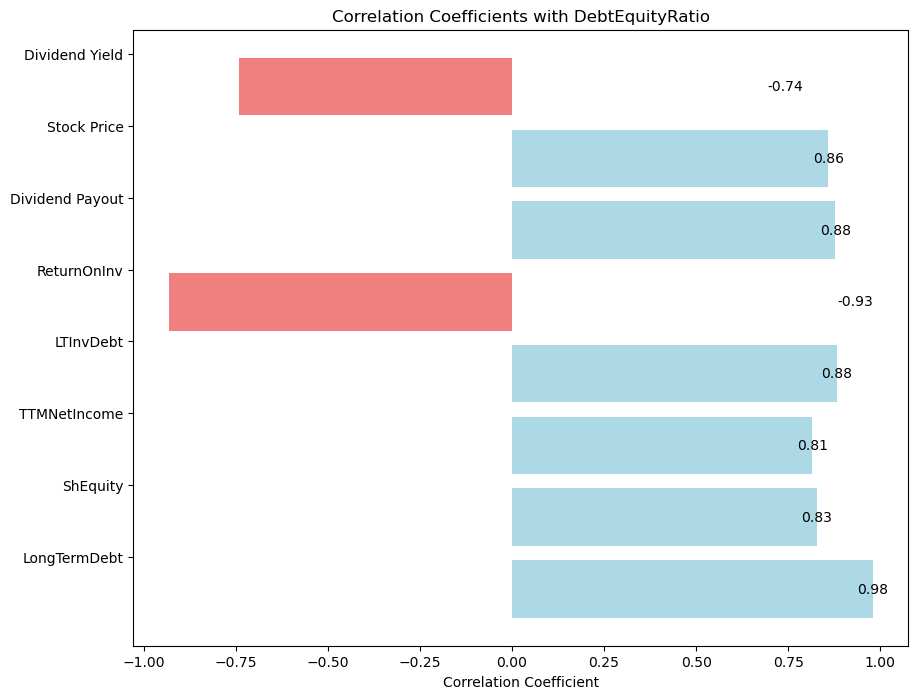

In [27]:
import numpy as np
import matplotlib.pyplot as plt

numeric_features = merged_df[['LongTermDebt', 'ShEquity', 'DebtEquityRatio', 'TTMNetIncome', 'LTInvDebt', 'ReturnOnInv','Dividend Payout',
       'Stock Price', 'Dividend Yield']]

labels = []
values = []

for column in numeric_features:
    if column != 'DebtEquityRatio':
        correlation = np.corrcoef(numeric_features[column].values, merged_df['DebtEquityRatio'].values)[0, 1]
        labels.append(column)
        values.append(correlation)

ind = np.arange(len(labels))
width = 0.9

colors = ['lightblue' if value >= 0 else 'lightcoral' for value in values]

fig, ax = plt.subplots(figsize=(10, 8))
rects = ax.barh(ind, np.array(values), color=colors)
ax.set_yticks(ind + ((width) / 2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation Coefficient")
ax.set_title("Correlation Coefficients with DebtEquityRatio")

for i, rect in enumerate(rects):
    ax.text(
        rect.get_width() * (1 if values[i] >= 0 else -1),
        rect.get_y() + rect.get_height() / 2,
        f'{values[i]:.2f}',
        ha='center',
        va='center',
        color='black',
        fontsize=10,
    )

plt.show()



# Clustering :

In [28]:
#import des librairies l'environnement
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

In [29]:
#Display of the whole table 
merged_df

,date,LongTermDebt,ShEquity,DebtEquityRatio,TTMNetIncome,LTInvDebt,ReturnOnInv,Year,Date,Dividend Payout,Stock Price,Dividend Yield
0,2009-03-31,22.000000,21.110001,1.04,9.50,41.200001,0.2997,2009,2009-03-11,0.49,12.64,3.25
1,2009-03-31,22.000000,21.110001,1.04,9.50,41.200001,0.2997,2009,2009-06-11,0.50,15.65,3.21
2,2009-03-31,22.000000,21.110001,1.04,9.50,41.200001,0.2997,2009,2009-09-11,0.52,16.72,3.09
3,2009-03-31,22.000000,21.110001,1.04,9.50,41.200001,0.2997,2009,2009-11-27,0.53,18.70,2.84
4,2009-06-30,22.540001,23.520000,0.96,8.30,31.700001,0.2889,2009,2009-03-11,0.49,12.64,3.25
...,...,...,...,...,...,...,...,...,...,...,...,...
303,2012-12-31,53.009998,33.169998,1.60,10.78,47.900002,0.2197,2012,2012-11-28,0.73,26.79,2.71
384,2013-03-31,55.560001,32.889999,1.69,10.68,47.189999,0.2203,2013,2013-03-13,0.75,27.73,2.71
385,2013-06-30,56.880001,32.630001,1.74,10.63,46.810001,0.2218,2013,2013-03-13,0.75,27.73,2.71
386,2013-09-30,56.970001,32.470001,1.76,10.31,46.639999,0.2187,2013,2013-03-13,0.75,27.73,2.71


In [30]:
#!pip install yellowbrick
#!pip install --upgrade threadpoolctl scikit-learn
#!pip install --user threadpoolctl==3.2.0
#!pip install --user scikit-learn==1.3.2
#!pip install --upgrade yellowbrick scikit-learn

## Elbow Method (Identify number of clusters)

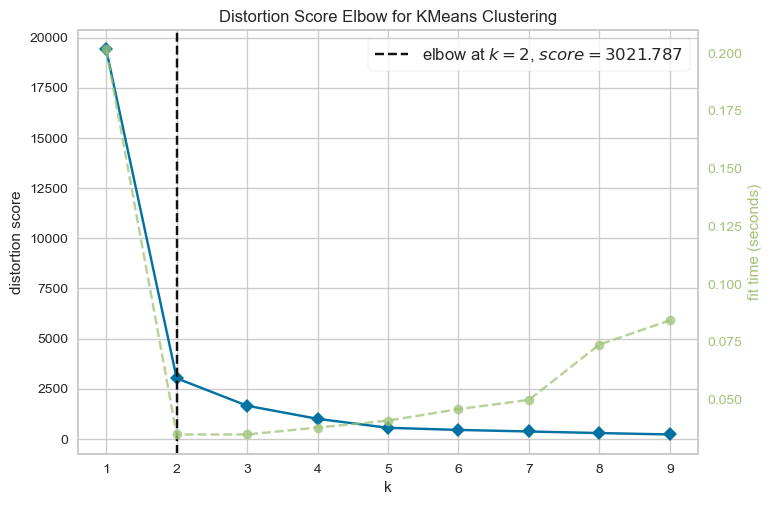

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Exclure la colonne 'Date' du DataFrame
merged_df = merged_df.drop('date', axis=1)
merged_df = merged_df.drop('Date', axis=1)
# Créer un modèle KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 10))

# Fit le visualizer avec les données numériques
visualizer.fit(merged_df)

# Affiche le graphique
visualizer.show()


# KMeans

In [32]:
from sklearn.cluster import KMeans

# Exclure la colonne 'Date' du DataFrame
Dividend_numeric = merged_df.select_dtypes(include=['number'])

# Créer un modèle KMeans avec 2 clusters
model = KMeans(n_clusters=2)

# Adapter le modèle avec les données numériques
model.fit(Dividend_numeric)


KMeans(n_clusters=2)

In [33]:
print(model.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Silhouette Score: 0.7388883950775691


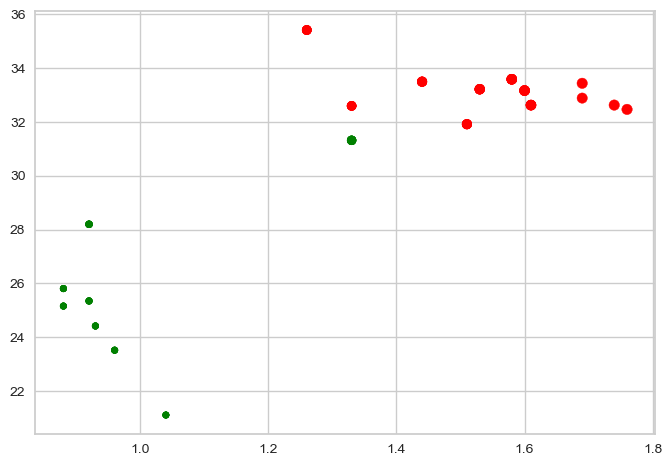

In [34]:
from sklearn.metrics import silhouette_score
colormap=np.array(['green','red','blue'])

plt.scatter(merged_df.DebtEquityRatio, merged_df.ShEquity, merged_df.LongTermDebt,c=colormap[model.labels_])
silhouette_avg = silhouette_score(merged_df, model.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.7388883950775691


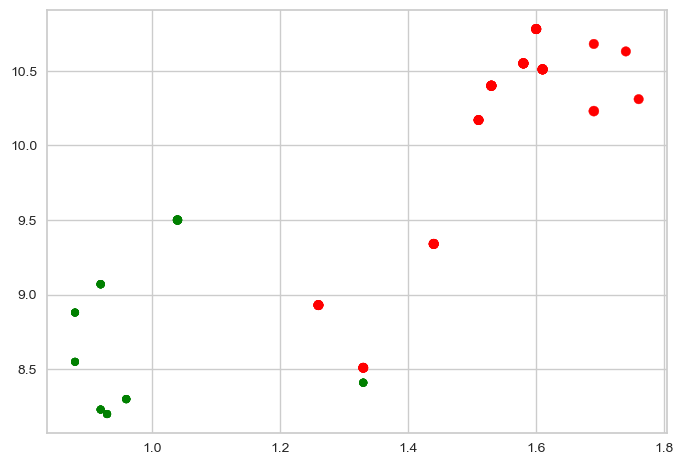

In [35]:
colormap=np.array(['green','red','blue'])

plt.scatter(merged_df.DebtEquityRatio, merged_df.TTMNetIncome, merged_df.LTInvDebt,c=colormap[model.labels_])
silhouette_avg = silhouette_score(merged_df, model.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.7388883950775691


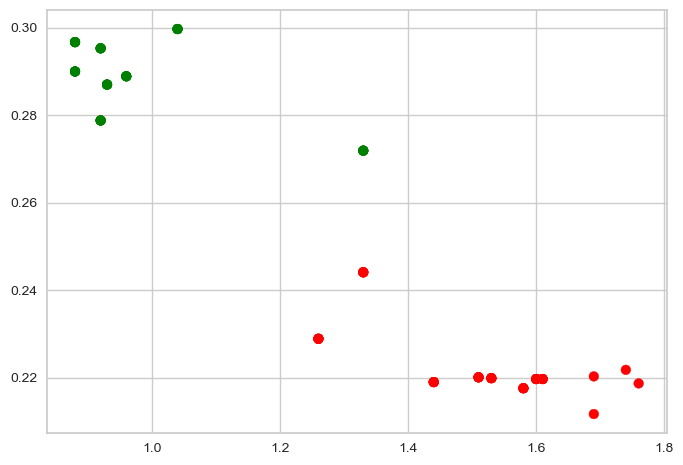

In [36]:
colormap=np.array(['green','red','blue'])

plt.scatter(merged_df.DebtEquityRatio,merged_df.ReturnOnInv,c=colormap[model.labels_])
silhouette_avg = silhouette_score(merged_df, model.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.7388883950775691


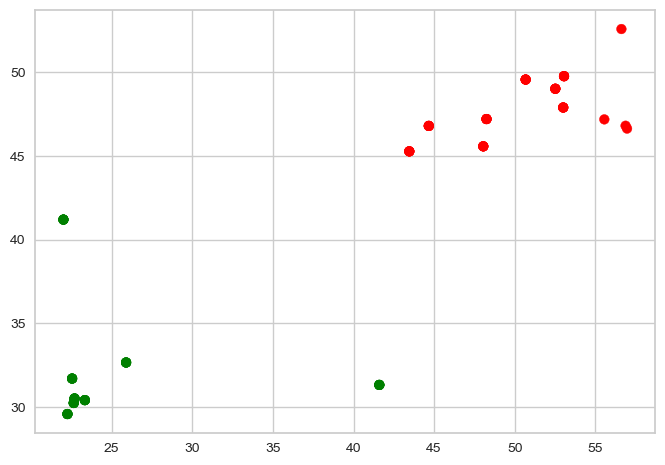

In [37]:
colormap=np.array(['green','red','blue'])

plt.scatter(merged_df.LongTermDebt, merged_df.LTInvDebt,c=colormap[model.labels_])
silhouette_avg = silhouette_score(merged_df, model.labels_)
print(f"Silhouette Score: {silhouette_avg}")

## Random Forest

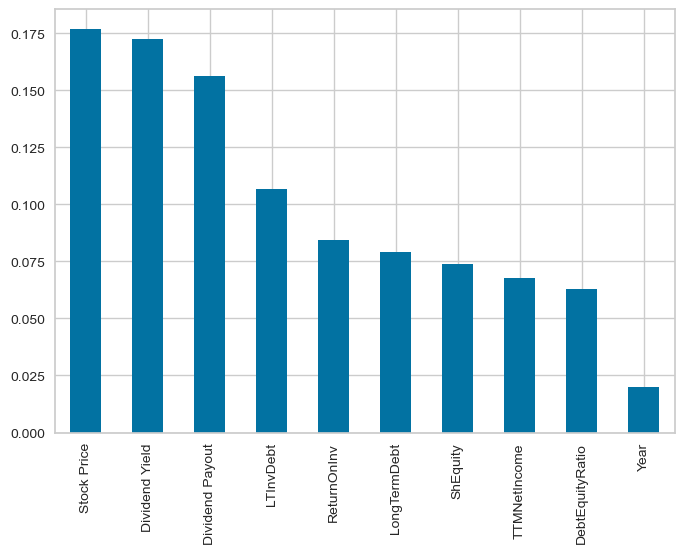

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming 'Dividend' contains your dataset

y = np.random.randint(0, 3, size=len(merged_df))  # Random labels for illustration

# Train a RandomForestClassifier to get feature importance
model = RandomForestClassifier()
model.fit(merged_df, y)

# Visualize feature importance
feature_importance = pd.Series(model.feature_importances_, index=merged_df.columns)
feature_importance.sort_values(ascending=False, inplace=True)
feature_importance.plot(kind='bar')
plt.show()

We tried to find the most imporatnt features in our dataframe .We have found that both "dividend Yield " and "stock price " have a significant importance .Therefore we gonna use these two features for clustering

## KMeans with Dividend Yield and stock Price

In [39]:
colormap = np.array(['green', 'red', 'blue'])

plt.scatter(merged_df['Dividend Yield'], merged_df['Stock Price'], c=colormap[model.labels_])
silhouette_avg = silhouette_score(merged_df, model.labels_)
print(f"Silhouette Score: {silhouette_avg}")

AttributeError: 'RandomForestClassifier' object has no attribute 'labels_'

## KMeans with Income of the company and Stock Price:

In [ ]:
colormap = np.array(['green', 'red', 'blue'])

plt.scatter(merged_df['TTMNetIncome'], merged_df['Stock Price'] ,c=colormap[model.labels_])
silhouette_avg = silhouette_score(merged_df, model.labels_)
print(f"Silhouette Score: {silhouette_avg}")

## KMeans with income of the company and Dividend Yield:

In [ ]:
colormap = np.array(['green', 'red', 'blue'])

plt.scatter(merged_df['TTMNetIncome'], merged_df['Dividend Yield'] ,c=colormap[model.labels_])
silhouette_avg = silhouette_score(merged_df, model.labels_)
print(f"Silhouette Score: {silhouette_avg}")

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Remplacez les données factices par vos propres données
# Assurez-vous que X est votre ensemble de données
X = merged_df[['LongTermDebt', 'ShEquity', 'DebtEquityRatio', 'TTMNetIncome', 'LTInvDebt', 'ReturnOnInv','Dividend Payout',
       'Stock Price', 'Dividend Yield']]

# Créez un objet DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)

# Appliquez DBSCAN sur les données
dbscan.fit(X)

# Récupérez les étiquettes de cluster attribuées à chaque point
labels = dbscan.labels_

# Affichez les clusters identifiés
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Nombre de clusters dans les étiquettes, en ignorant le bruit s'il est présent
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Affichage des résultats
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Bruit
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy['Stock Price'], xy['Dividend Yield'], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy['Stock Price'], xy['Dividend Yield'], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title(f'Nombre d\'estimations de clusters: {n_clusters_}')
plt.show()

# Calculate silhouette score
silhouette_avg = silhouette_score(merged_df, model.labels_)
print(f"Silhouette Score: {silhouette_avg}")

# Hierarchical Clustering (CAH)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Select the numeric columns from your dataset
X = merged_df[['LongTermDebt', 'ShEquity', 'DebtEquityRatio', 'TTMNetIncome', 'LTInvDebt', 'ReturnOnInv','Dividend Payout',
       'Stock Price', 'Dividend Yield']]

# Create a dendrogram to determine the number of clusters
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

# Based on the dendrogram, choose an appropriate number of clusters
# You can visually inspect the dendrogram and select the number of clusters

# Create and fit the AgglomerativeClustering model with the chosen number of clusters
n_clusters = 3  # Adjust the number of clusters as needed
model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
model.fit(X)

# Print cluster labels
print(model.labels_)
# Calculate silhouette score
silhouette_avg = silhouette_score(merged_df, model.labels_)
print(f"Silhouette Score: {silhouette_avg}")


# GMM:

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Select the numeric columns from your dataset
X = merged_df[['LongTermDebt', 'ShEquity', 'DebtEquityRatio', 'TTMNetIncome', 'LTInvDebt', 'ReturnOnInv','Dividend Payout',
       'Stock Price', 'Dividend Yield']]

# Standardize the data (important for GMM)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Determine the optimal number of components (clusters) using the Bayesian Information Criterion (BIC)
bic = []
n_components_range = range(1, 10)
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_standardized)
    bic.append(gmm.bic(X_standardized))

# Choose the number of components with the lowest BIC
optimal_components = n_components_range[np.argmin(bic)]

# Create and fit the GMM model with the chosen number of components
gmm = GaussianMixture(n_components=optimal_components, random_state=42)
labels = gmm.fit_predict(X_standardized)

# Add cluster labels to the original DataFrame
X_with_labels = X.copy()
X_with_labels['Cluster'] = labels

# Print cluster labels
print(X_with_labels['Cluster'].values)

# Calculate silhouette score
silhouette_avg = silhouette_score(X_standardized, labels)
print(f"Silhouette Score: {silhouette_avg}")

# Visualize the clusters in 2D
plt.scatter(X['LongTermDebt'], X['ShEquity'], c=labels, cmap='viridis')
plt.title('Gaussian Mixture Model Clustering without PCA')
plt.xlabel('LongTermDebt')
plt.ylabel('ShEquity')
plt.show()

# Interpretations

### Interpretation Objective:

Through this comprehensive analysis of dividend yield, stock price, and company income, we aim to **identify the key factors that contribute to a company's profitability and investor appeal**. By understanding the trends and patterns within these financial indicators, we can **gain valuable insights into the company's overall financial health and its potential for long-term growth.**

**These periods of strong financial performance can be used to showcase the company's attractiveness to potential investors, highlighting its ability to provide consistent dividends and generate capital appreciation.**

Furthermore, by analyzing the factors that influence investor interest, **we can tailor our investment strategy to effectively attract new shareholders.** This may involve **enhancing dividend payouts**, implementing **share buyback programs**, or focusing on initiatives that improve the company's financial outlook and growth prospects.

By leveraging the insights gained from this analysis, we can effectively communicate the company's financial strengths and potential to a wider audience of investors, thereby increasing investor confidence and driving demand for our company's stock.

### The best clustering method:

Comparing the Silhouette Score of each of the methods of clustering executed previsously, we can conclude that **KMEANS** is the best method with a Silhouette Score equal to 0.7388883950775691 which is the most superieur value of all of them.

 A silhouette score of 0.73 for K-means suggests that the clusters generated by K-means have a good separation and cohesion.

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Set the number of clusters to 2
n_clusters = 2

# Apply KMeans with 2 clusters
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

# Calculate the average silhouette score for the entire model
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette moyenne pour l'ensemble du modèle : {silhouette_avg}")

# Calculate the silhouette for each sample
sample_silhouette_values = silhouette_samples(X, kmeans.labels_)

# Add the silhouette to your dataframe
merged_df['Silhouette'] = sample_silhouette_values

# Plot the silhouette for each sample in the two clusters
plt.figure(figsize=(10, 6))
y_lower = 10  # Initialize y_lower

# Use the cluster labels assigned by KMeans
cluster_labels = np.unique(kmeans.labels_)

for cluster in cluster_labels:
    # Select the silhouette values for the specific cluster
    cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == cluster]
    
    # Sort the silhouette values for better visualization
    cluster_silhouette_values.sort()

    # Calculate the height of the subplot based on the number of silhouette points for the cluster
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Fill the subplot area with the cluster color
    color = plt.cm.viridis(float(cluster) / len(cluster_labels))
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the subplot with the cluster number in the middle
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(cluster))

    # Update the height of the next area
    y_lower = y_upper + 10  # 10 for spaces between clusters

plt.title("Visualisation de la silhouette pour chaque cluster")
plt.xlabel("Valeurs de silhouette")
plt.ylabel("Numéro de cluster")

# Vertical line for the average silhouette of all samples
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.yticks([])  # Clear yticks for cluster numbers

plt.show()

### Dividend Yield and Stock Price

In [ ]:
colormap = np.array(['green', 'red', 'blue'])

plt.scatter(merged_df['Dividend Yield'], merged_df['Stock Price'], c=colormap[model.labels_])
silhouette_avg = silhouette_score(merged_df, model.labels_)
print(f"Silhouette Score: {silhouette_avg}")

When dividend yields are high, stock prices are low, and vice versa.
This observation is consistent with financial concepts. In general, there is an inverse relationship between dividend yield and stock prices.

**RED Cluster:** Investors may prefer stocks with a higher yield when looking for consistent income, and this can lead to lower stock prices.

**GREEN Cluster:** A low dividend yield with a high share price can also indicate that investors have confidence in the company's ability to generate high returns from its operations, which can be reflected in a higher valuation of the stock.

### Income and Stock Price:

In [ ]:
colormap = np.array(['green', 'red', 'blue'])

plt.scatter(merged_df['TTMNetIncome'], merged_df['Stock Price'] ,c=colormap[model.labels_])
silhouette_avg = silhouette_score(merged_df, model.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Net earnings over the last 12 months are high when stock prices are high.
A positive relationship between net income and stock prices is generally expected.

**GREEN Clusters:** Investors are often willing to pay a higher price for shares of profitable companies.

**RED Clusters :** Investors are often intimidated to invest in companies that has low income therefore the stock price is generally low.

### Income and Dividend :

In [ ]:
colormap = np.array(['green', 'red', 'blue'])

plt.scatter(merged_df['TTMNetIncome'], merged_df['Dividend Yield'] ,c=colormap[model.labels_])
silhouette_avg = silhouette_score(merged_df, model.labels_)
print(f"Silhouette Score: {silhouette_avg}")

When dividend yields are high, Income is low, and vice versa.In general, there is an inverse relationship between dividend yield and the company's Income.

**GREEN Cluster:** When the dividend yield is low, it suggests that the company is choosing to reinvest a significant portion of its profits rather than distribute them to shareholders.By focusing on reinvestment, the company aims to stimulate growth and strengthen its long-term competitiveness.

**RED Cluster:** when the dividend yield is high,the company is distributing its income to shareholders to insure the profitability of its investors hence build its value and have more investors.

# Goals:

**Emphasis on Growth:**

Action: The company may choose to reinvest a significant portion of its profits to fund expansion projects, research and development, or other strategic initiatives.
Potential Outcome: This could lead to lower dividend payouts but may attract investors seeking capital appreciation and long-term growth.

**Balanced Approach:**

Action: Maintain a balanced approach by allocating a portion of profits to dividends while also reinvesting in the business.
Potential Outcome: This strategy may appeal to a broader range of investors, including those looking for both income and potential stock value appreciation.

**Income Stability:**

Action: Prioritize stable dividend payouts, even at the expense of higher reinvestment in the business.
Potential Outcome: This approach may attract income-focused investors seeking consistent and reliable dividend income.


This overarching goal stems from the idea of making more informed decisions to maximize benefits for investors while supporting the growth and financial stability of the company.

# Dimensions Reduction

## PCA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming your data is in a DataFrame called 'merged_df'
# Perform PCA
pca = PCA()
pca.fit(merged_df)

# Calculate the variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

# Generate scree plot as a bar chart
plt.bar(np.arange(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')

# Identify the elbow point
cumulative_variance = np.cumsum(explained_variance)
total_variance = cumulative_variance[-1]
variance_threshold = 0.95  # Set the threshold for total variance explained
elbow_point = np.argmax(cumulative_variance >= variance_threshold * total_variance) + 1

# Add a marker for the elbow point
plt.axvline(x=elbow_point, color='r', linestyle='--', label='Elbow Point')
plt.legend()

# Display variance explained by each PC as text above each bar
for i, var in enumerate(explained_variance):
    plt.text(i + 1, var, f'{var * 100:.2f}%', ha='center', va='bottom')

# Display the plot
plt.show()

The following Scree Plot identifies 2 PCS as the Elbow point indicates.The first PC represents 93.31% of our Data. However, PC2 is negligible compared to PC1, which represents only 4.43%. Therefore, we conclude that almost all our data is concentrated in PC1

In [ ]:
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter plot of Principal Components')
plt.show()

We observe that the clusters are more concentrated when PC1 is positive compared to when there are clusters in the negative part of PC1. Regarding PC2, we notice that the clusters are more concentrated in the negative part than in the positive part. Therefore, our clusters are closer to PC1.

In [ ]:
from matplotlib.patches import Circle  # Import Circle from matplotlib

# Fit PCA
pca = PCA()
principal_components = pca.fit_transform(merged_df)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the correlation circle
def plot_correlation_circle(principal_components, explained_variance_ratio, columns):
    # Get the loadings (correlation coefficients between original variables and principal components)
    loadings = pca.components_.T * np.sqrt(explained_variance_ratio)

    # Plot correlation circle
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.axhline(0, color='black', linewidth=0.2)
    ax.axvline(0, color='black', linewidth=0.2)

    for i, (x, y) in enumerate(zip(loadings[:, 0], loadings[:, 1])):
        ax.arrow(0, 0, x, y, head_width=0.05, head_length=0.05, fc='r', ec='r')
        ax.text(x + 0.10, y + 0.15, columns[i], color='b')

    # Add a circle
    circle = Circle((0, 0), 1, edgecolor='b', facecolor='none', linestyle='dotted', linewidth=2)
    ax.add_patch(circle)

    ax.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.2f}%)')
    ax.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.2f}%)')
    ax.set_title('Correlation Circle')

    plt.show()

# Call the function to plot the correlation circle
plot_correlation_circle(principal_components, explained_variance_ratio, merged_df.columns)

According to the correlation circle, we observe that the data points are closer to the x-axis (PC1) than the y-axis (PC2). We also notice that long-term debt represents a significant portion in PC1, and then ltInvDet, which is considered less important, represents a larger portion compared to other data points.

# Anomaly detection 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Assuming 'merged_df' is your DataFrame containing the relevant columns

# Perform PCA on the data
pca = PCA(n_components=2)
pc_values = pca.fit_transform(merged_df)

# Create a new DataFrame with PC1 and PC2 columns
pca_df = pd.DataFrame(pc_values, columns=['PC1', 'PC2'])

# Define the columns with potential outliers
columns_with_outliers = ['PC1', 'PC2']

# Create subplots for each column
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Box Plots for PC1 and PC2', fontsize=16)

# Create box plots for each column
for i, column in enumerate(columns_with_outliers):
    sns.boxplot(data=pca_df, y=column, ax=axes[i], color='skyblue')
    axes[i].set_title(column)
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()

After applying the outlier values theorem to our clean data, we observed that there are outlier values in PC2. This suggests that there is a special event responsible for this anomaly. However, since PC2 represents only 4% of our data, it remains a negligible anomaly that can be addressed in the future.

# Association Rules:

In [ ]:
merged_df['Dividend Yield'].describe()

In [ ]:
merged_df['Stock Price'].describe()

In [ ]:
merged_df = merged_df.drop('Silhouette', axis=1)

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

dividend_bins = [-float('inf'), 2.71, 3.08, float('inf')]
dividend_labels = ['dividend_very_low', 'dividend_low', 'dividend_high']
merged_df['dividend_Category'] = pd.cut(merged_df['Dividend Yield'], bins=dividend_bins, labels=dividend_labels)

price_bins = [-float('inf'), 17.67, 24.55, float('inf')]
price_labels = ['price_very_low', 'price_low', 'price_high']
merged_df['price_Category'] = pd.cut(merged_df['Stock Price'], bins=price_bins, labels=price_labels)

dividend_dummies = pd.get_dummies(merged_df['dividend_Category'], prefix='')
price_dummies = pd.get_dummies(merged_df['price_Category'], prefix='')

merged_df = pd.concat([merged_df, dividend_dummies, price_dummies], axis=1)
merged_df = merged_df.drop(['dividend_Category', 'price_Category'], axis=1)

# Convert the dummy columns to boolean (0 or 1)
merged_df_boolean = merged_df.iloc[:, -8:].astype(bool)

frequent_itemsets = apriori(merged_df_boolean, min_support=0.1, use_colnames=True)
print(frequent_itemsets)

In [ ]:
merged_df

In [ ]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets , metric="confidence",min_threshold=0.7)
print(rules)


We can conclude that confidence between :

**Dividend_very_low + price_high + confidence > 0.5** ==> Investors can profit from the investment after couple years

**Dividend_low + price_low + confidence > 0.5** ==> Investors that are still new to the field who wants to have a share from coca cola without any consequence of investment 

**Dividend_high + price_very_low + confidence > 0.5** ==> Investors can profit from the investment regulary with a financial stability

# Supervised learning:

##  Regression

# <font color=red> Studying the Data for the appropriate model </font>

## Chosing the target for prediction:

We chose Dividend Payout as our target to predict because we want to attract investors to invest in the Coca cola's stock exchange.Hence knowing what the investor will gain in the future if he invests in the stock will get more investors to contribute in Coca cola's stock exchange.This prediction can be used to showcase the company's attractiveness to potential investors, highlighting its ability to provide consistent dividends and generate capital appreciation.

In [332]:
merged_df

,LongTermDebt,ShEquity,DebtEquityRatio,TTMNetIncome,LTInvDebt,ReturnOnInv,Dividend Payout,Stock Price,Dividend Yield
0,22.000000,21.110001,1.04,9.50,41.200001,0.2997,0.49,12.64,3.25
1,22.000000,21.110001,1.04,9.50,41.200001,0.2997,0.50,15.65,3.21
2,22.000000,21.110001,1.04,9.50,41.200001,0.2997,0.52,16.72,3.09
3,22.000000,21.110001,1.04,9.50,41.200001,0.2997,0.53,18.70,2.84
4,22.540001,23.520000,0.96,8.30,31.700001,0.2889,0.49,12.64,3.25
...,...,...,...,...,...,...,...,...,...
303,53.009998,33.169998,1.60,10.78,47.900002,0.2197,0.73,26.79,2.71
384,55.560001,32.889999,1.69,10.68,47.189999,0.2203,0.75,27.73,2.71
385,56.880001,32.630001,1.74,10.63,46.810001,0.2218,0.75,27.73,2.71
386,56.970001,32.470001,1.76,10.31,46.639999,0.2187,0.75,27.73,2.71


In [334]:
#dropping year column
merged_df = merged_df.drop("Year", axis=1)

### Scatter Plots with Target

Visualize Relationships: Scatter plots provide a visual representation of the relationship between each feature and the target column. They allow you to observe the nature of the relationship, such as whether it is linear, nonlinear, or if there are any outliers. This visualization can provide insights into the data and help you understand how the features might influence the target variable.


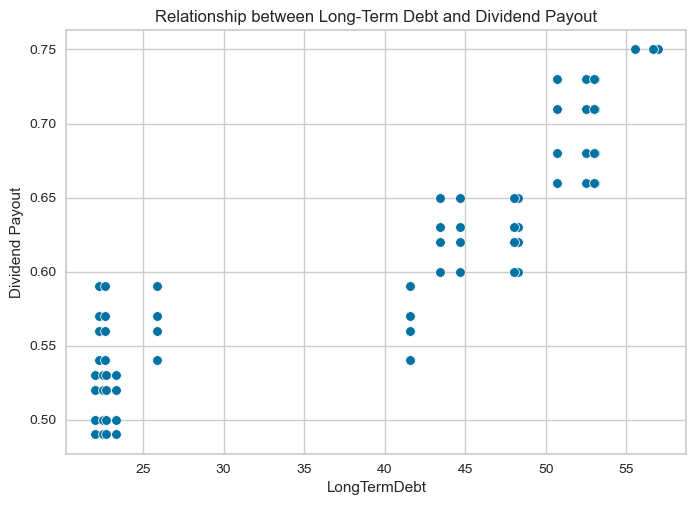

In [335]:
#LongTermDebt and target
sns.scatterplot(x='LongTermDebt',y='Dividend Payout',data=merged_df)
plt.title('Relationship between Long-Term Debt and Dividend Payout')
plt.show()

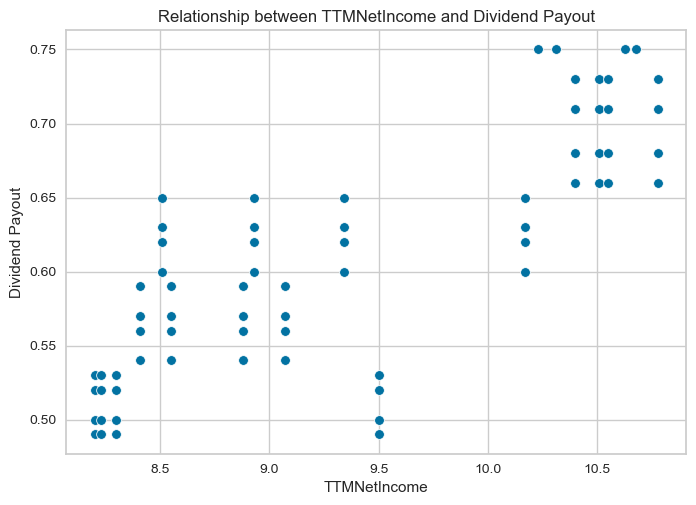

In [336]:
#TTMNetIncome and target
sns.scatterplot(x='TTMNetIncome',y='Dividend Payout',data=merged_df)
plt.title('Relationship between TTMNetIncome and Dividend Payout')
plt.show()

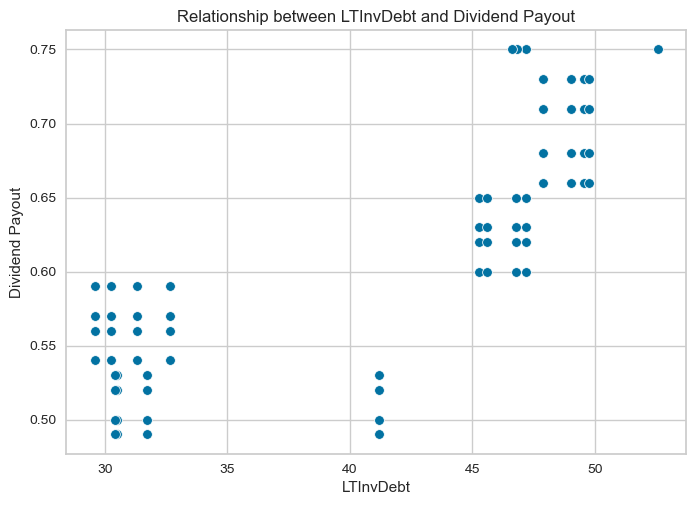

In [337]:
#LTInvDebt and target
sns.scatterplot(x='LTInvDebt',y='Dividend Payout',data=merged_df)
plt.title('Relationship between LTInvDebt and Dividend Payout')
plt.show()

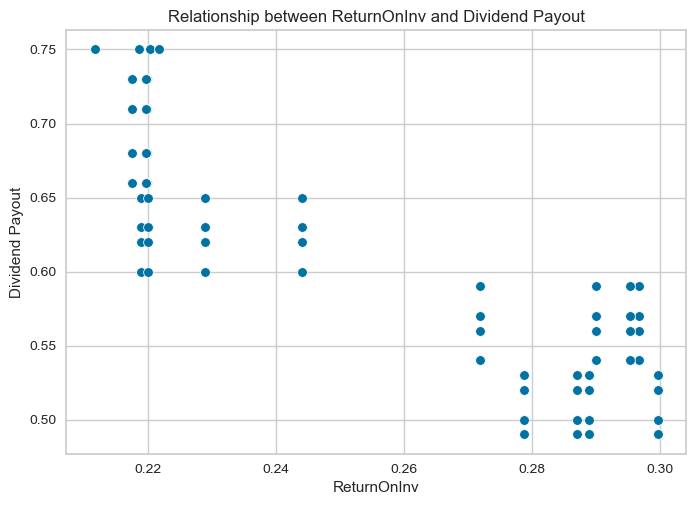

In [338]:
#ReturnOnInv and target
sns.scatterplot(x='ReturnOnInv',y='Dividend Payout',data=merged_df)
plt.title('Relationship between ReturnOnInv and Dividend Payout')
plt.show()

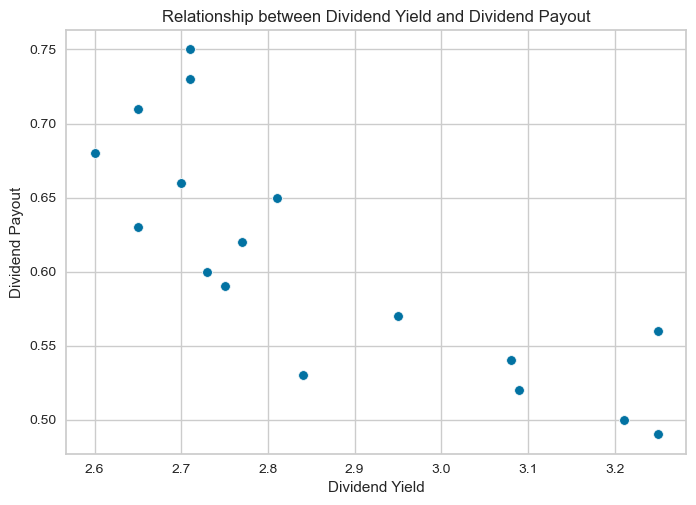

In [339]:
#Dividend Payout and target
sns.scatterplot(x='Dividend Yield',y='Dividend Payout',data=merged_df)
plt.title('Relationship between Dividend Yield and Dividend Payout')
plt.show()

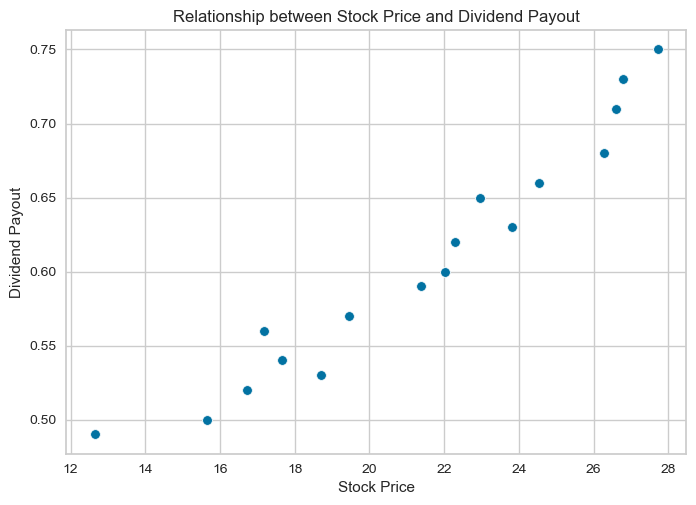

In [340]:
#Stock Price and target
sns.scatterplot(x='Stock Price',y='Dividend Payout',data=merged_df)
plt.title('Relationship between Stock Price and Dividend Payout')
plt.show()

### Correlation with target 

In [341]:
# Calcul des coefficients de corrélation
correlation_matrix = merged_df.corr()

# Affichage de la corrélation avec la variable cible
correlation_with_target = correlation_matrix['Dividend Payout'].sort_values(ascending=False)
print(correlation_with_target)

Dividend Payout    1.000000
Stock Price        0.969209
LongTermDebt       0.895172
DebtEquityRatio    0.877269
LTInvDebt          0.814042
TTMNetIncome       0.811794
ShEquity           0.808299
Dividend Yield    -0.805289
ReturnOnInv       -0.856522
Name: Dividend Payout, dtype: float64


# <font color=red> Linear Simple regression </font>

## Traget: Dividend Payout  & Feature :Stock Price

In [342]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

### **Divide Data into two parts : training and testing.**

In [343]:
X = merged_df[['Stock Price']]
y = merged_df['Dividend Payout']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### **Visualise Data.**

Text(0, 0.5, 'Dividend Payout')

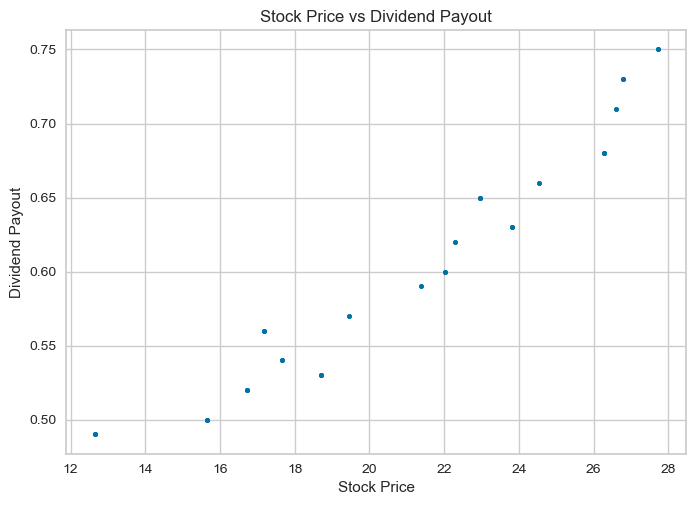

In [344]:
plt.scatter(X_train['Stock Price'], y_train, s=10) 
plt.title('Stock Price vs Dividend Payout')
plt.xlabel('Stock Price')
plt.ylabel('Dividend Payout')

### **Train The Model.**

In [345]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [346]:
print(lr.intercept_)
print(lr.coef_)

0.23966798856041593
[0.01726662]


**intercept**: is the value of the target when all features are equal to zero

**coefficient**: it's the influence of the input feature on the target variable

Text(0, 0.5, 'Dividend Payout')

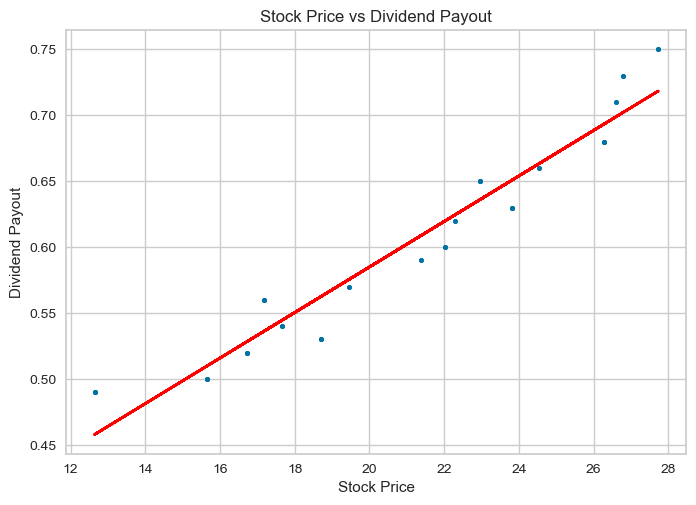

In [347]:
plt.scatter(X_train['Stock Price'], y_train, s=10)

y_pred = lr.predict(X_train)
plt.plot(X_train['Stock Price'], y_pred, color='red')

plt.title('Stock Price vs Dividend Payout')
plt.xlabel('Stock Price')
plt.ylabel('Dividend Payout')

### **Evaluate the Model.**

In [348]:
y_pred_test = lr.predict(X_test)

In [349]:
r2 = r2_score(y_test, y_pred_test)
print(r2)

0.943886733387941


In [350]:
print('MSE = ',mean_squared_error(y_test, y_pred_test))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('MAE = ', mean_absolute_error(y_test, y_pred_test))

MSE =  0.00023201117991026842
RMSE =  0.015231913205840835
MAE =  0.01213236461931049


## Traget: Dividend Payout  & Feature :LongTermDebt

### **Divide Data into two parts : training and testing.**

In [351]:
X = merged_df[['LongTermDebt']]
y = merged_df['Dividend Payout']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### **Visualise Data.**

Text(0, 0.5, 'LongTermDebt')

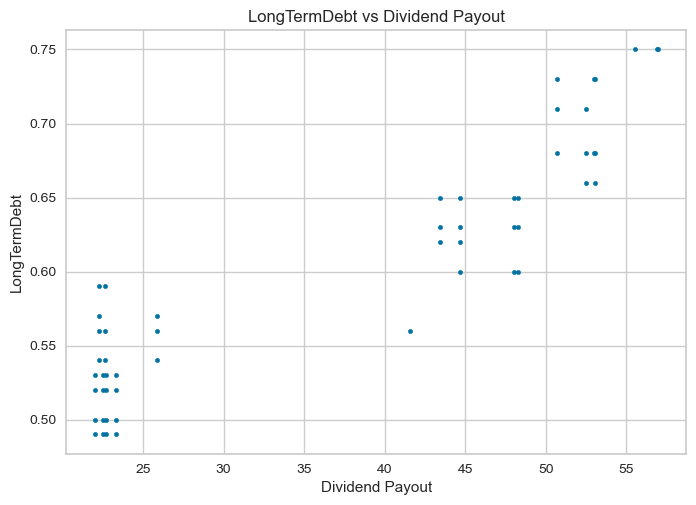

In [352]:
plt.scatter(X_train['LongTermDebt'], y_train, s=10) 
plt.title('LongTermDebt vs Dividend Payout')
plt.xlabel('LongTermDebt')
plt.ylabel('Dividend Payout')

### **Train The Model.**

In [353]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [354]:
print(lr.intercept_)
print(lr.coef_)

0.40364720429326695
[0.00535345]


Text(0, 0.5, 'Dividend Payout')

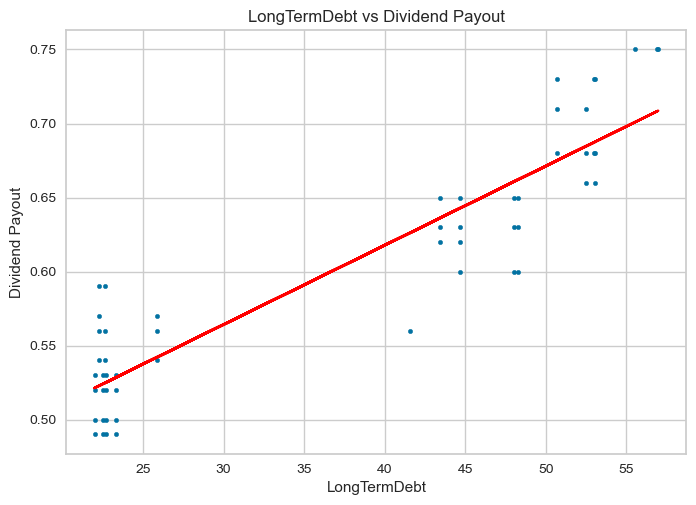

In [355]:
plt.scatter(X_train['LongTermDebt'], y_train, s=10)

y_pred = lr.predict(X_train)
plt.plot(X_train['LongTermDebt'], y_pred, color='red')

plt.title('LongTermDebt vs Dividend Payout')
plt.xlabel('LongTermDebt')
plt.ylabel('Dividend Payout')

### **Evaluate the Model.**

In [356]:
y_pred_test = lr.predict(X_test)

In [357]:
r2 = r2_score(y_test, y_pred_test)
print(r2)

0.5350110183613519


In [358]:
print('MSE = ',mean_squared_error(y_test, y_pred_test))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('MAE = ', mean_absolute_error(y_test, y_pred_test))

MSE =  0.0019225870955100026
RMSE =  0.04384731571613025
MAE =  0.04048456121063464


# <font color=red> Linear Multiple regression </font>

#### Done with RFE for feature selection:

In [359]:
merged_df

,LongTermDebt,ShEquity,DebtEquityRatio,TTMNetIncome,LTInvDebt,ReturnOnInv,Dividend Payout,Stock Price,Dividend Yield
0,22.000000,21.110001,1.04,9.50,41.200001,0.2997,0.49,12.64,3.25
1,22.000000,21.110001,1.04,9.50,41.200001,0.2997,0.50,15.65,3.21
2,22.000000,21.110001,1.04,9.50,41.200001,0.2997,0.52,16.72,3.09
3,22.000000,21.110001,1.04,9.50,41.200001,0.2997,0.53,18.70,2.84
4,22.540001,23.520000,0.96,8.30,31.700001,0.2889,0.49,12.64,3.25
...,...,...,...,...,...,...,...,...,...
303,53.009998,33.169998,1.60,10.78,47.900002,0.2197,0.73,26.79,2.71
384,55.560001,32.889999,1.69,10.68,47.189999,0.2203,0.75,27.73,2.71
385,56.880001,32.630001,1.74,10.63,46.810001,0.2218,0.75,27.73,2.71
386,56.970001,32.470001,1.76,10.31,46.639999,0.2187,0.75,27.73,2.71


In [360]:
from sklearn.model_selection import train_test_split
X = merged_df.drop('Dividend Payout', axis=1)
y = merged_df[['Dividend Payout']]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=3)

In [361]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
linreg2 = LinearRegression() #créer une instance

# Créer un sélecteur de fonctionnalités RFE avec le modèle linéaire et le nombre de fonctionnalités à sélectionner
rfe = RFE(linreg2, n_features_to_select=5)  # Choisissez le nombre approprié de fonctionnalités

# Adapter le sélecteur de fonctionnalités sur les données d'entraînement
rfe.fit(X_train, y_train)

# Obtenir les indices des fonctionnalités sélectionnées
selected_feature_indices = rfe.support_

# Appliquer la sélection de fonctionnalités sur les ensembles d'entraînement et de test
X_train_selected = X_train.iloc[:, selected_feature_indices]
X_test_selected = X_test.iloc[:, selected_feature_indices]

# Entrainer le modèle sur les fonctionnalités sélectionnées
linreg2.fit(X_train_selected, y_train)

# Prédire sur l'ensemble de test avec les fonctionnalités sélectionnées
y_pred_selected = linreg2.predict(X_test_selected)

In [362]:
#INTERCEPT= a0 :The intercept (often labeled the constant) is the expected mean value of Y when all X=0. 
#Independent term in the linear model. Set to 0.0 if fit_intercept = False.
print('Intercept = ', linreg2.intercept_)
#Estimated coefficients for the linear regression problem
print('Coefficients : ',linreg2.coef_)

Intercept =  [-0.41520468]
Coefficients :  [[-0.00017564  0.00905925 -0.07264196  0.02571299  0.16975401]]


**Negative Intercept** :In the context of linear regression, a negative intercept means that the predicted value of the target variable is expected to decrease as the input features approach zero.

**Negatice coefficient** : In the context of linear regression, a negative coefficient means that there is a negative relationship between the corresponding input feature and the target variable

In [363]:
print('MSE = ', mean_squared_error(y_test, y_pred_selected))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred_selected)))
print('MAE = ', mean_absolute_error(y_test, y_pred_selected))

MSE =  0.00045601568913652567
RMSE =  0.021354523856469517
MAE =  0.012992582779266595


In [364]:
r2_selected = r2_score(y_test, y_pred_selected)
print('R square :', r2_selected)

R square : 0.936754121801048


# <font color=red>Lasso-Ridge-ElasticNet</font>

### Normalization

we need to normalize the features before training the model in order to make the coefficient comparabale;our data contains features in percentage ,in million dollars and billion dollars;therefore we need to standardize all variables.

In [365]:
#dataframe name changed after scaling "df_sc"
#normalization doesn't change the pattern of the scatter plot
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_sc=scaler.fit_transform(merged_df)
df_sc[0]

array([-1.22951712, -1.97087552, -0.74510627,  0.17373149,  0.09560456,
        1.35728558, -1.50482316, -2.01938168,  1.76090343])

In [366]:
#checking the first observation for target in normalization
#normalization operation is (value-mean)/std
merged_df.describe()

,LongTermDebt,ShEquity,DebtEquityRatio,TTMNetIncome,LTInvDebt,ReturnOnInv,Dividend Payout,Stock Price,Dividend Yield
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,38.420441,29.635147,1.261176,9.340735,40.415147,0.253849,0.607647,21.318235,2.867647
std,13.454492,4.357724,0.299046,0.923545,8.270411,0.034033,0.078761,4.329423,0.218749
min,22.000000,21.110001,0.880000,8.200000,29.580000,0.211700,0.490000,12.640000,2.600000
25%,22.690001,25.350000,0.930000,8.510000,31.320000,0.219700,0.540000,17.670000,2.710000
50%,43.459999,31.920000,1.330000,9.070000,45.279999,0.244100,0.600000,22.020000,2.770000
75%,50.680000,33.182499,1.530000,10.400000,47.382500,0.288900,0.660000,24.550000,3.080000
max,56.970001,35.419998,1.760000,10.780000,52.590000,0.299700,0.750000,27.730000,3.250000


In [367]:
(3.25-2.867647)/0.218749

1.7479074190053447

In [368]:
df_sc= pd.DataFrame(df_sc,columns=merged_df.columns)
df_sc.head()

,LongTermDebt,ShEquity,DebtEquityRatio,TTMNetIncome,LTInvDebt,ReturnOnInv,Dividend Payout,Stock Price,Dividend Yield
0,-1.229517,-1.970876,-0.745106,0.173731,0.095605,1.357286,-1.504823,-2.019382,1.760903
1,-1.229517,-1.970876,-0.745106,0.173731,0.095605,1.357286,-1.376913,-1.318970,1.576686
2,-1.229517,-1.970876,-0.745106,0.173731,0.095605,1.357286,-1.121093,-1.069986,1.024033
3,-1.229517,-1.970876,-0.745106,0.173731,0.095605,1.357286,-0.993183,-0.609250,-0.127327
4,-1.189083,-1.413723,-1.014613,-1.135270,-1.061609,1.037586,-1.504823,-2.019382,1.760903


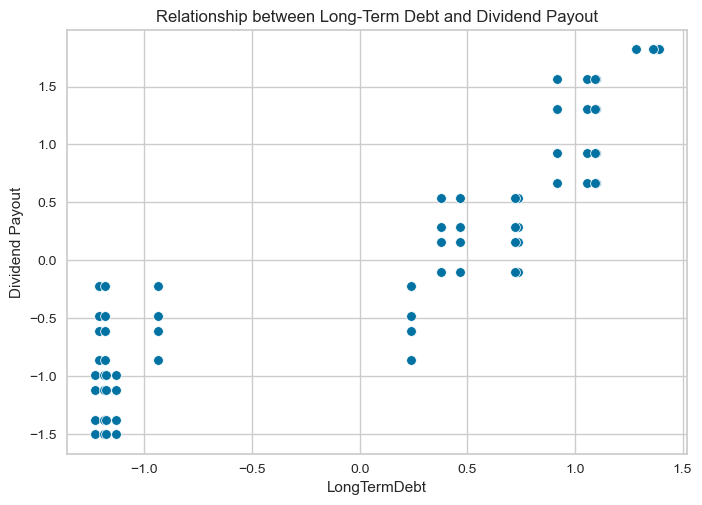

In [369]:
#Display of one of the scatter plots as exemple after normalization
#LongTermDebt and target
sns.scatterplot(x='LongTermDebt',y='Dividend Payout',data=df_sc)
plt.title('Relationship between Long-Term Debt and Dividend Payout')
plt.show()

### Splitting the Data

In [370]:
rand_state=1000
y = df_sc['Dividend Payout']
X = df_sc.drop('Dividend Payout',axis=1) #implace needs to be false so dataframe won't be replaced
from sklearn.model_selection import train_test_split
#test set is 20% and train set is 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=rand_state)
X_train.head()

,LongTermDebt,ShEquity,DebtEquityRatio,TTMNetIncome,LTInvDebt,ReturnOnInv,Stock Price,Dividend Yield
54,1.055736,0.692362,1.175127,1.275475,1.048174,-1.010858,1.231367,-1.002360
67,1.362732,0.879620,1.444634,0.970040,1.483043,-1.247672,1.491985,-0.726034
22,-1.181596,-0.884312,-1.284119,-0.502586,-1.239455,1.268480,-0.437056,0.379272
65,1.382201,0.692362,1.613075,1.406375,0.778970,-0.948694,1.491985,-0.726034
39,0.467950,1.337364,-0.003963,-0.448044,0.777751,-0.738521,0.384357,-0.265490


As we can see from the table above,the variable are **highly correlated** with each other

### OLS to find the best hyperplane

OLS finds the line that best fits the data by minimizing the sum of the squares of the vertical distances between each data point and the line.

In [371]:
#to get information about the coefficient,R_squared...
import statsmodels.api as sm
X_test_wc =sm.add_constant(X_test)
X_train_wc = sm.add_constant(X_train)

In [372]:
model = sm.OLS(y_train, X_train_wc).fit()
model.summary()
#look at R_sqaured,adj R_squared and P>[t]
#this is done to know if there is relationship between the feature and the target

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Dividend Payout   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     294.9
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           3.09e-36
Time:                        00:35:07   Log-Likelihood:                 30.032
No. Observations:                  54   AIC:                            -42.06
Df Residuals:                      45   BIC:                            -24.16
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0003      0.021     -0.015      0.988      -0.043       0.043
LongTermDebt        1.3770      1.151      1.197      0.238      -0.940       3.694
ShEquity           -0.4426      0.369     -1.199      0.237      -1.186       0.301
DebtEquityRatio    -0.8533      0.750     -1.137      0.261      -2.364       0.658
TTMNetIncome        0.0289      0.053      0.550      0.585      -0.077       0.135
LTInvDebt           0.0639      0.064      0.992      0.327      -0.066       0.194
ReturnOnInv         0.0458      0.106      0.434      0.666      -0.167       0.258
Stock Price         1.2043      0.096     12.534      0.000       1.011       1.398
Dividend Yield      0.4272      0.062      6.841      0.000       0.301       0.553
==============================================================================
Omnibus:                        4.366   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.113   Jarque-Bera (JB):                3.578
Skew:                           0.394   Prob(JB):                        0.167
Kurtosis:                       3.985   Cond. No.                         180.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**P-value** : is the significance level if it is below 0,05 that indicates that the coefficient is statistically significant, meaning there is evidence of a relationship between the feature and the target variable.

### Cross Validation (find the best hyperparameter alpha)

**objectives:**

+tune the hyperparameters :Let's use cross validation to find the optimal Lambdas (alphas) for different models

+estimate the performance metrics in the test set

#### 1) Optimal alpha for Ridge regression

In [373]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
ridgecv = RidgeCV()
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.1

In [374]:
#save it in  a variable
alpha_ridge_opt = ridgecv.alpha_

#### 2) Optimal alpha for Lasso regression

In [375]:
lassocv = LassoCV()
lassocv.fit(X_train, y_train)
lassocv.alpha_

0.003249937143814596

In [376]:
#save it in  a variable
alpha_lasso_opt = lassocv.alpha_

#### 3) Optimal alpha for Elastic Net regression

In [377]:
elasticnetcv = ElasticNetCV()
elasticnetcv.fit(X_train, y_train)
elasticnetcv.alpha_

0.003988262591773521

In [378]:
#save it in  a variable
alpha_elasticnet_opt = elasticnetcv.alpha_

## chosing the right hyperparameter alpha:

### Plotting the regression coefficients vs alphas: 

#### 1) Ridge regression coefficients vs alpha

In [379]:
ridge = Ridge()
coefs_ridge = []

for i in alpha_ridge:
    ridge.set_params(alpha = i)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    
np.shape(coefs_ridge)

(100, 8)

this code snippet performs ridge regression for a range of alpha values, collects the coefficients obtained for each alpha value. The resulting coefs_ridge will indicate the optimal alpha value.

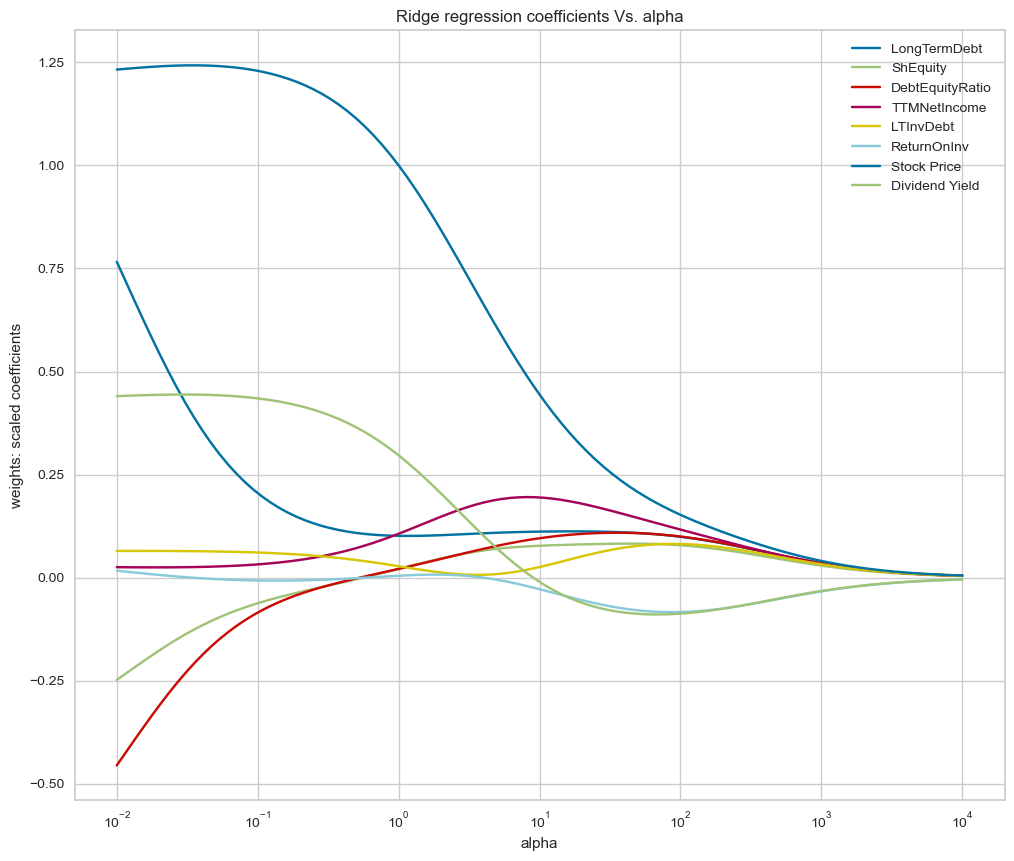

In [380]:
plt.figure(figsize=(12, 10))
ax = plt.gca()

# Reshape coefs_ridge to (100, 8)
coefs_ridge_reshaped = np.squeeze(coefs_ridge)

# Plotting the coefficients
ax.plot(alpha_ridge, coefs_ridge_reshaped)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Ridge regression coefficients Vs. alpha')
plt.legend(merged_df.drop('Dividend Payout', axis=1, inplace=False).columns)

plt.show()

#### 2) Lasso regression coefficients vs alpha

In [381]:
alpha_lasso = 10**np.linspace(-3,1,100)

In [382]:
lasso = Lasso()
coefs_lasso = []

for i in alpha_lasso:
    lasso.set_params(alpha = i)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    
np.shape(coefs_lasso)

(100, 8)

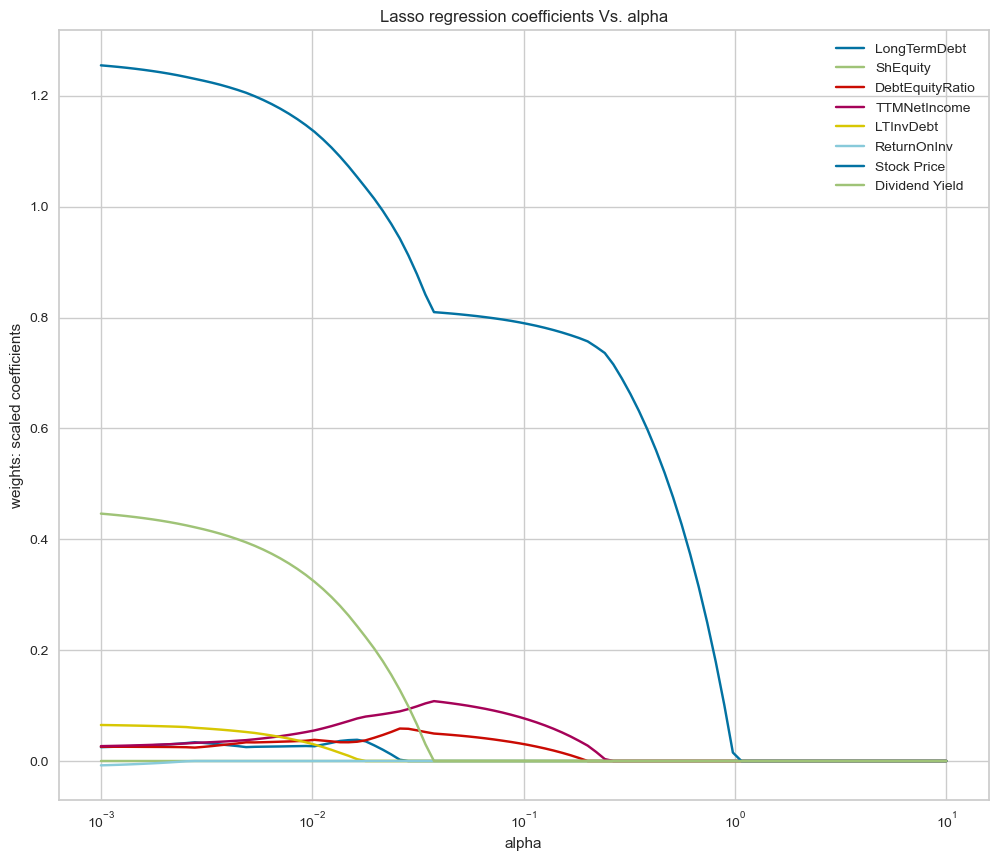

In [383]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_lasso, coefs_lasso)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Lasso regression coefficients Vs. alpha')
plt.legend(merged_df.drop('Dividend Payout',axis=1, inplace=False).columns)

plt.show()

**interpretation** 

from this graph we can deduct the importance of the features in our models

if the coef is equal to 0 that means that the feature doen't appear in the model and has no importance but if the value if different than zero that means thhe feature has a significant importance in our model

#### 3) Elastic Net regression coefficients vs alpha

In [384]:
alpha_elasticnet = 10**np.linspace(-3,2,100)

In [385]:
elasticnet = ElasticNet()
coefs_elasticnet = []

for i in alpha_elasticnet:
    elasticnet.set_params(alpha = i)
    elasticnet.fit(X_train, y_train)
    coefs_elasticnet.append(elasticnet.coef_)
    
np.shape(coefs_elasticnet)

(100, 8)

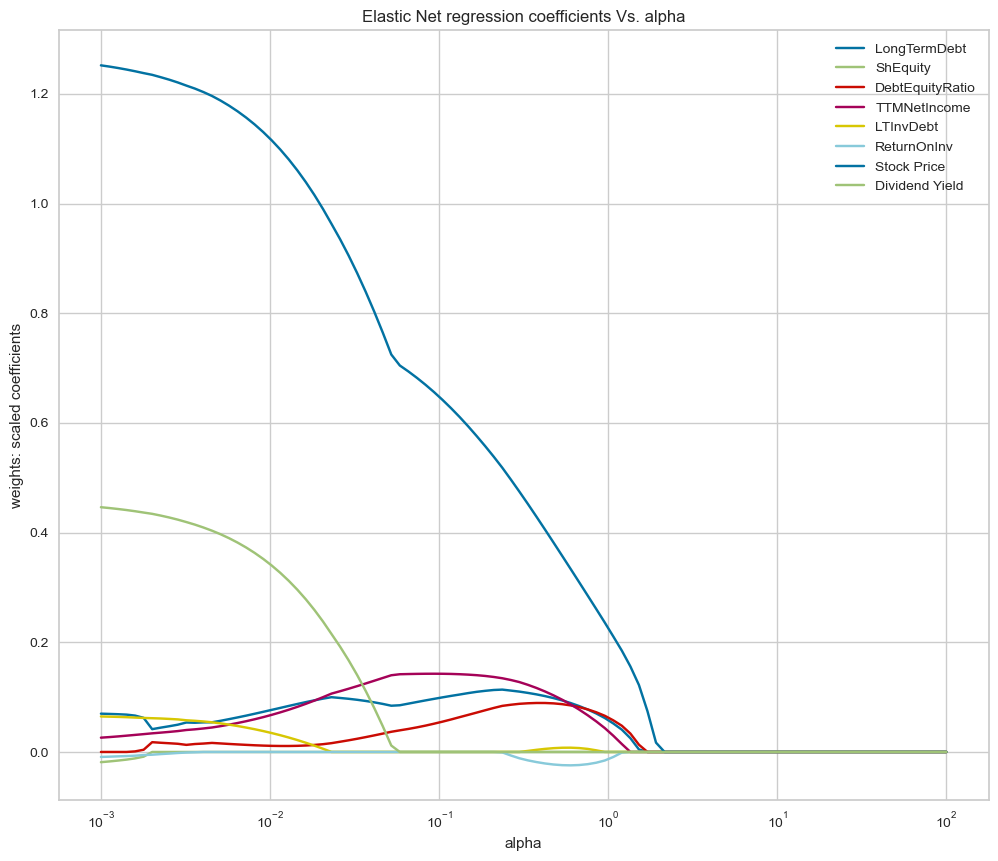

In [386]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_elasticnet, coefs_elasticnet)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Elastic Net regression coefficients Vs. alpha')
plt.legend(merged_df.drop('Dividend Payout',axis=1, inplace=False).columns)

plt.show()

### Training the models

In this section we will train 3 different models:
    

   1. Ridge regression
   2. Lasso regression
   3. Elastic Net regression

In [387]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
model_ridge = Ridge(alpha=alpha_ridge_opt)
model_lasso = Lasso(alpha=alpha_lasso_opt)
model_net = ElasticNet(alpha=alpha_elasticnet_opt)

In [388]:
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net   = model_net.fit(X_train, y_train).predict(X_test)

In [389]:
df_predictions = pd.DataFrame({'y_test':y_test,                         
                               'y_hat_ridge':y_hat_ridge,
                               'y_hat_lasso':y_hat_lasso,
                               'y_hat_net':y_hat_net})
df_predictions.head()

,y_test,y_hat_ridge,y_hat_lasso,y_hat_net
57,0.925466,1.079054,1.077395,1.080485
38,0.285916,0.327674,0.339616,0.336965
3,-0.993183,-0.869259,-0.845511,-0.850365
34,0.285916,0.300463,0.316819,0.305833
9,-1.376913,-1.128785,-1.138814,-1.142520


This dataframe enable us to compare the real values (y_test ) and the predicted values (y_hat)

### Coefficients

In [390]:
merged_df.drop('Dividend Payout', axis=1, inplace=False).columns

Index(['LongTermDebt', 'ShEquity', 'DebtEquityRatio', 'TTMNetIncome',
       'LTInvDebt', 'ReturnOnInv', 'Stock Price', 'Dividend Yield'],
      dtype='object')

In [391]:
#we have new datframe named "coefficients"
coefficients = pd.DataFrame({'Features':merged_df.drop('Dividend Payout', axis=1, inplace=False).columns})
coefficients['model_ridge']= model_ridge.coef_
coefficients['model_lasso']= model_lasso.coef_
coefficients['model_net']= model_net.coef_
coefficients

,Features,model_ridge,model_lasso,model_net
0,LongTermDebt,0.205008,0.031477,0.053792
1,ShEquity,-0.062022,0.000000,-0.000000
2,DebtEquityRatio,-0.084688,0.026725,0.015324
3,TTMNetIncome,0.032228,0.033754,0.042633
4,LTInvDebt,0.060975,0.058244,0.055824
5,ReturnOnInv,-0.006769,-0.000000,-0.000009
6,Stock Price,1.229207,1.225179,1.204081
7,Dividend Yield,0.434803,0.415617,0.409887


### Performance in the test set (RMSE_test)

#### Ridge regression

In [392]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_predictions['y_test'] and df_predictions['y_hat_ridge'] are your true and predicted values

MSE_test = mean_squared_error(df_predictions['y_test'], df_predictions['y_hat_ridge'])
RMSE_test = np.sqrt(MSE_test)
R2_test = r2_score(df_predictions['y_test'], df_predictions['y_hat_ridge'])

print("MSE:", np.round(MSE_test, 3))
print("RMSE:", np.round(RMSE_test, 3))
print("R-squared (R2):", np.round(R2_test, 3))

MSE: 0.029
RMSE: 0.17
R-squared (R2): 0.964


#### Lasso regression

In [393]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_predictions['y_test'] and df_predictions['y_hat_lasso'] are your true and predicted values for Lasso regression

MSE_test_lasso = mean_squared_error(df_predictions['y_test'], df_predictions['y_hat_lasso'])
RMSE_test_lasso = np.sqrt(MSE_test_lasso)
R2_test_lasso = r2_score(df_predictions['y_test'], df_predictions['y_hat_lasso'])

print("MSE (Lasso):", np.round(MSE_test_lasso, 3))
print("RMSE (Lasso):", np.round(RMSE_test_lasso, 3))
print("R-squared (R2) (Lasso):", np.round(R2_test_lasso, 3))

MSE (Lasso): 0.029
RMSE (Lasso): 0.169
R-squared (R2) (Lasso): 0.965


#### Elastic Net regression

In [444]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_predictions['y_test'] and df_predictions['y_hat_net'] are your true and predicted values for the neural network

MSE_test_net = mean_squared_error(df_predictions['y_test'], df_predictions['y_hat_net'])
RMSE_test_net = np.sqrt(MSE_test_net)
R2_test_net = r2_score(df_predictions['y_test'], df_predictions['y_hat_net'])

print("MSE (Neural Network):", np.round(MSE_test_net, 3))
print("RMSE (Neural Network):", np.round(RMSE_test_net, 3))
print("R-squared (R2) (Neural Network):", np.round(R2_test_net, 3))

MSE (Neural Network): 0.029
RMSE (Neural Network): 0.169
R-squared (R2) (Neural Network): 0.965


# <font color=red> Decision Trees Regression: </font> 

### Defining the variables and splitting the data

In [395]:
y = merged_df['Dividend Payout']
X = merged_df.drop('Dividend Payout', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [396]:
X_train.head()

,LongTermDebt,ShEquity,DebtEquityRatio,TTMNetIncome,LTInvDebt,ReturnOnInv,Stock Price,Dividend Yield
294,52.520000,32.630001,1.61,10.51,49.020000,0.2197,26.61,2.65
387,56.619999,33.439999,1.69,10.23,52.590000,0.2117,27.73,2.71
102,22.639999,25.809999,0.88,8.88,30.240000,0.2967,19.44,2.95
385,56.880001,32.630001,1.74,10.63,46.810001,0.2218,27.73,2.71
199,44.669998,35.419998,1.26,8.93,46.799999,0.2289,22.97,2.81


### DTs regression with Sklearn

In [397]:
from sklearn.tree import DecisionTreeRegressor
# Fitting regression tree to the Training set
Tree_regressor = DecisionTreeRegressor()
Tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [398]:
# Predicting the Test set results
y_hat = Tree_regressor.predict(X_test)

In [399]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
297,0.68,0.68
198,0.63,0.63
3,0.53,0.54
194,0.63,0.63
9,0.50,0.50


### Evaluating the model on test dataset

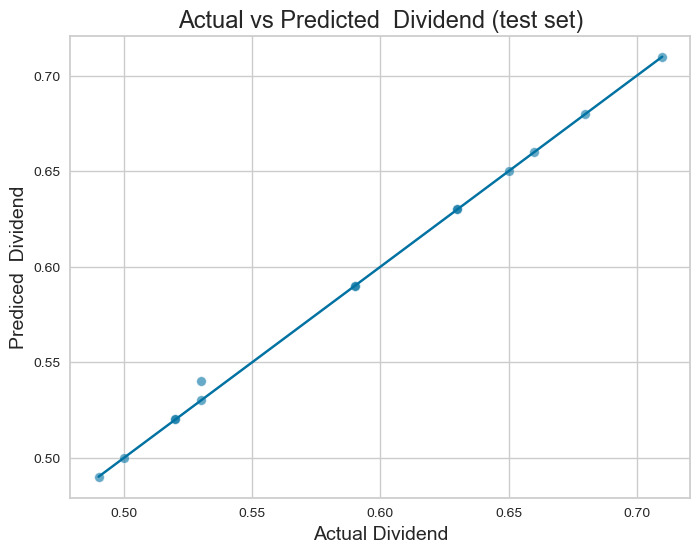

In [400]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual Dividend', fontsize=14)
plt.ylabel('Prediced  Dividend', fontsize=14)
plt.title('Actual vs Predicted  Dividend (test set)', fontsize=17)
plt.show()

In [401]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.0

### Pruning the tree using cost complexity pruning method.

#### Choosing alpha with cross validation

The cost_complexity_pruning_path method of a decision tree classifier in Python's scikit-learn library returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. This method is used for cost-complexity pruning of the tree, which is a way to avoid overfitting by reducing the size of the tree

In [402]:
from sklearn.model_selection import cross_val_score
path = DecisionTreeRegressor().cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

The ccp_alphas are calculated by the algorithm rather than being set manually. They are determined based on the structure and characteristics of the decision tree that is built from your data.

When you call the cost_complexity_pruning_path method, the algorithm goes through the tree and calculates these alpha values by evaluating the effect of pruning each node on the overall impurity of the tree. It's a data-driven process, and the resulting ccp_alphas are specific to the tree that was built from your dataset.

The cost_complexity_pruning_path function generates a sequence of candidate values for alpha by exploring the pruning path from the largest subtree to the smallest subtree.

The function then computes the effective value of alpha for each subtree as the difference in cost complexity between the parent subtree and the current subtree, divided by the number of leaves removed in the pruning step. The effective value of alpha for the largest subtree is set to zero.

The function returns an array of the effective values of alpha for each subtree in the pruning path, **which can be used to select the optimal value of alpha for pruning the decision tree**

In [403]:
path

{'ccp_alphas': array([0.00000000e+00, 2.46913580e-06, 2.77777778e-06, 8.88888889e-06,
        9.87654321e-06, 1.11111111e-05, 1.26984127e-05, 1.48148148e-05,
        1.73611111e-05, 2.41975309e-05, 3.84800385e-05, 3.95959596e-05,
        7.05467372e-05, 1.64819959e-04, 5.65993266e-04, 7.06504446e-04,
        4.59659266e-03]),
 'impurities': array([3.08395285e-18, 2.46913580e-06, 5.24691358e-06, 1.41358025e-05,
        2.40123457e-05, 3.51234568e-05, 4.78218695e-05, 6.26366843e-05,
        7.99977954e-05, 1.04195326e-04, 1.42675365e-04, 1.82271324e-04,
        2.52818062e-04, 4.17638020e-04, 9.83631286e-04, 1.69013573e-03,
        6.28672840e-03])}

In [404]:
RMSE_CV=[]
for alpha in ccp_alphas:
    MSE = -cross_val_score(estimator = DecisionTreeRegressor(random_state=1,ccp_alpha=alpha), X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )
    RMSE_CV.append(np.sqrt(MSE).mean())
    
output = pd.DataFrame(list(ccp_alphas), columns=['alpha'])
output['RMSE_CV']=RMSE_CV

output.head()

,alpha,RMSE_CV
0,0.000000,0.014673
1,0.000002,0.014684
2,0.000003,0.014690
3,0.000009,0.014265
4,0.000010,0.014963


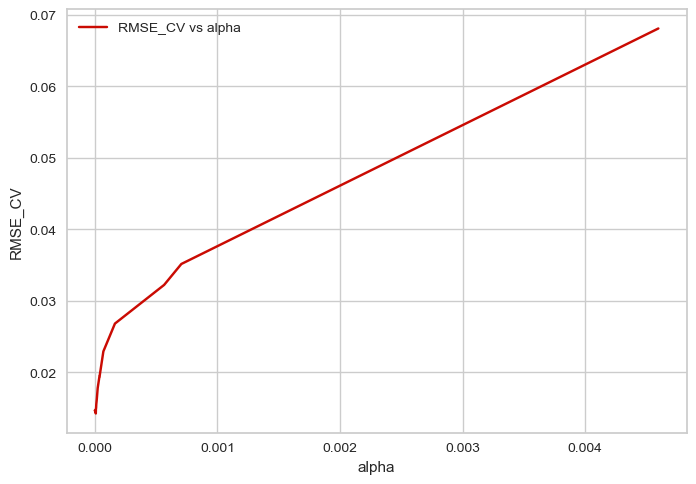

In [405]:
sns.lineplot(x='alpha', y='RMSE_CV', data=output , color='r', label="RMSE_CV vs alpha")
plt.show()

In [406]:
np.argmin(output['RMSE_CV'])

3

In [407]:
output.iloc[np.argmin(output['RMSE_CV']),]

alpha      0.000009
RMSE_CV    0.014265
Name: 3, dtype: float64

In [408]:
optimal_alpha = output.iloc[np.argmin(output['RMSE_CV']),][0]
optimal_alpha

8.8888888888875e-06

## Visualizing the Tree

In [409]:
merged_df.columns

Index(['LongTermDebt', 'ShEquity', 'DebtEquityRatio', 'TTMNetIncome',
       'LTInvDebt', 'ReturnOnInv', 'Dividend Payout', 'Stock Price',
       'Dividend Yield'],
      dtype='object')

In [410]:
dtree= DecisionTreeRegressor(ccp_alpha=optimal_alpha)
dtree.fit(X_train, y_train)
wage_hat = dtree.predict(X_test)

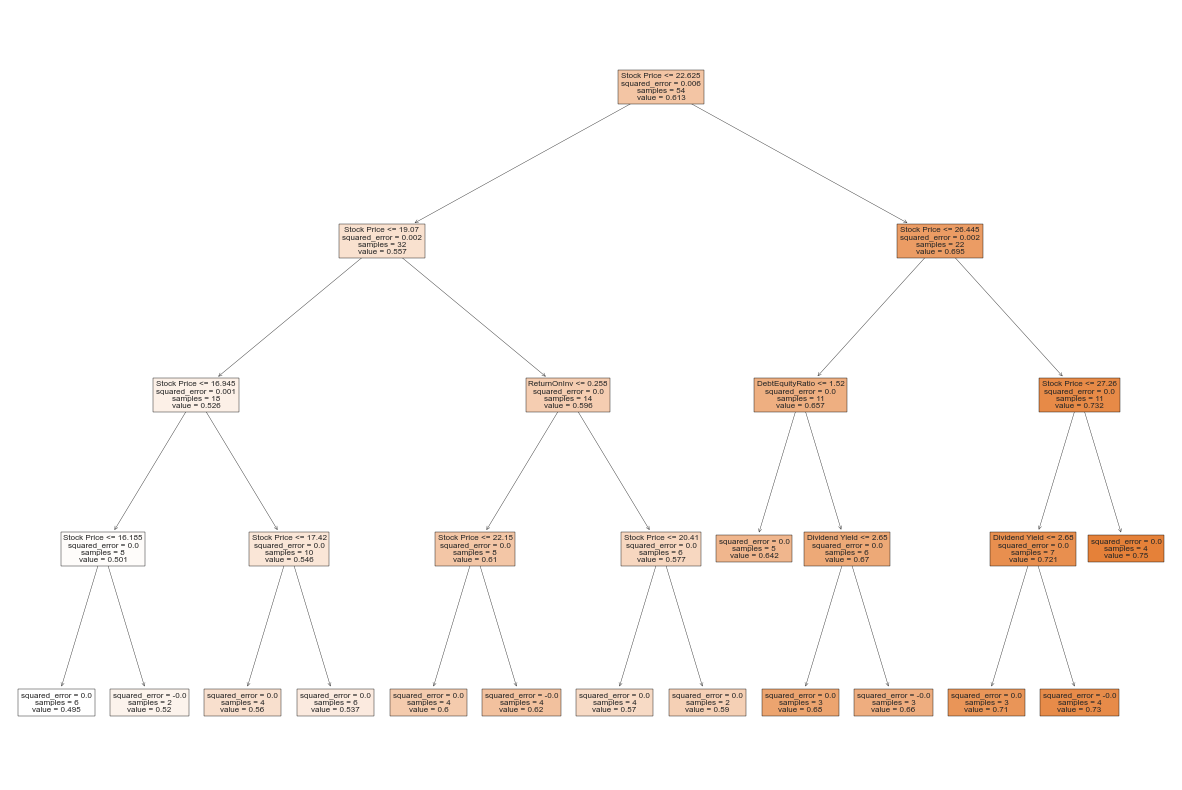

In [411]:
from sklearn import tree
fig = plt.figure(figsize=(15,10))
DT_plot = tree.plot_tree(dtree, feature_names=X_train.columns, filled=True)
# left branch True

## PyCaret

PyCaret is an open-source, low-code machine learning library in Python designed to simplify the end-to-end machine learning process

**Model Training:** It supports the training of various machine learning models from different libraries (like scikit-learn, XGBoost, LightGBM, etc.) with just a single line of code.

**Model Evaluation:** PyCaret provides tools for model evaluation, comparison, and performance visualization.

**Hyperparameter Tuning:** It allows for hyperparameter tuning and optimization for better model performance.

In [412]:
#pip install pycaret

In [413]:
from pycaret.utils import version
version()

'3.2.0'

In [414]:
from pycaret.regression import *
setup(data=merged_df,  target='Dividend Payout', session_id=555, train_size=0.7, preprocess=True)

,Description,Value
0,Session id,555
1,Target,Dividend Payout
2,Target type,Regression
3,Original data shape,"(68, 9)"
4,Transformed data shape,"(68, 9)"
5,Transformed train set shape,"(47, 9)"
6,Transformed test set shape,"(21, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [415]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


### Create and tune model

In [416]:
dt_reg = create_model(estimator='dt') 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0020,0.0000,0.0045,0.9952,0.0028,0.0034
1,0.0020,0.0000,0.0045,0.9941,0.0029,0.0038
2,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
3,0.0040,0.0001,0.0089,0.9834,0.0051,0.0053
4,0.0020,0.0000,0.0045,0.9970,0.0029,0.0038
5,0.0040,0.0001,0.0089,0.9831,0.0058,0.0074
6,0.0080,0.0003,0.0179,0.9426,0.0116,0.0154
7,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
8,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [439]:
tuned_dt_reg = tune_model(dt_reg)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0152,0.0003,0.0164,0.9353,0.0103,0.0260
1,0.0128,0.0002,0.0143,0.9402,0.0090,0.0219
2,0.0141,0.0003,0.0162,0.9696,0.0098,0.0222
3,0.0222,0.0007,0.0257,0.8632,0.0153,0.0336
4,0.0103,0.0001,0.0122,0.9777,0.0074,0.0167
5,0.0052,0.0000,0.0070,0.9897,0.0043,0.0089
6,0.0182,0.0004,0.0197,0.9304,0.0122,0.0297
7,0.0080,0.0001,0.0092,0.9841,0.0057,0.0128
8,0.0129,0.0002,0.0135,0.8968,0.0084,0.0210


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## Plot feature importance

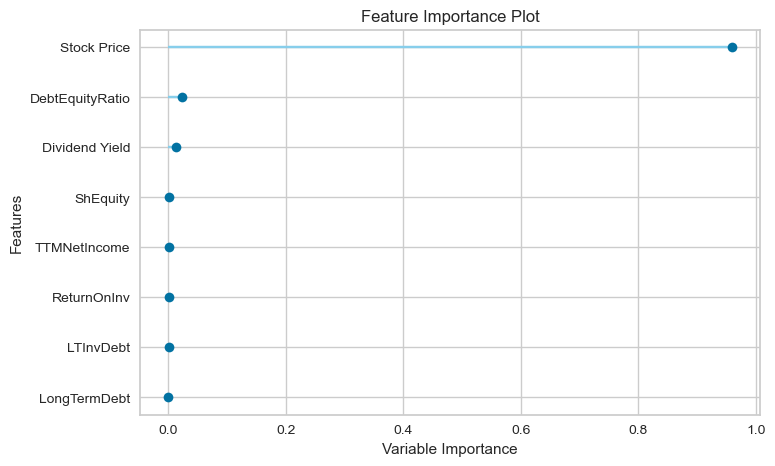

In [421]:
plot_model(tuned_dt_reg, plot = 'feature')

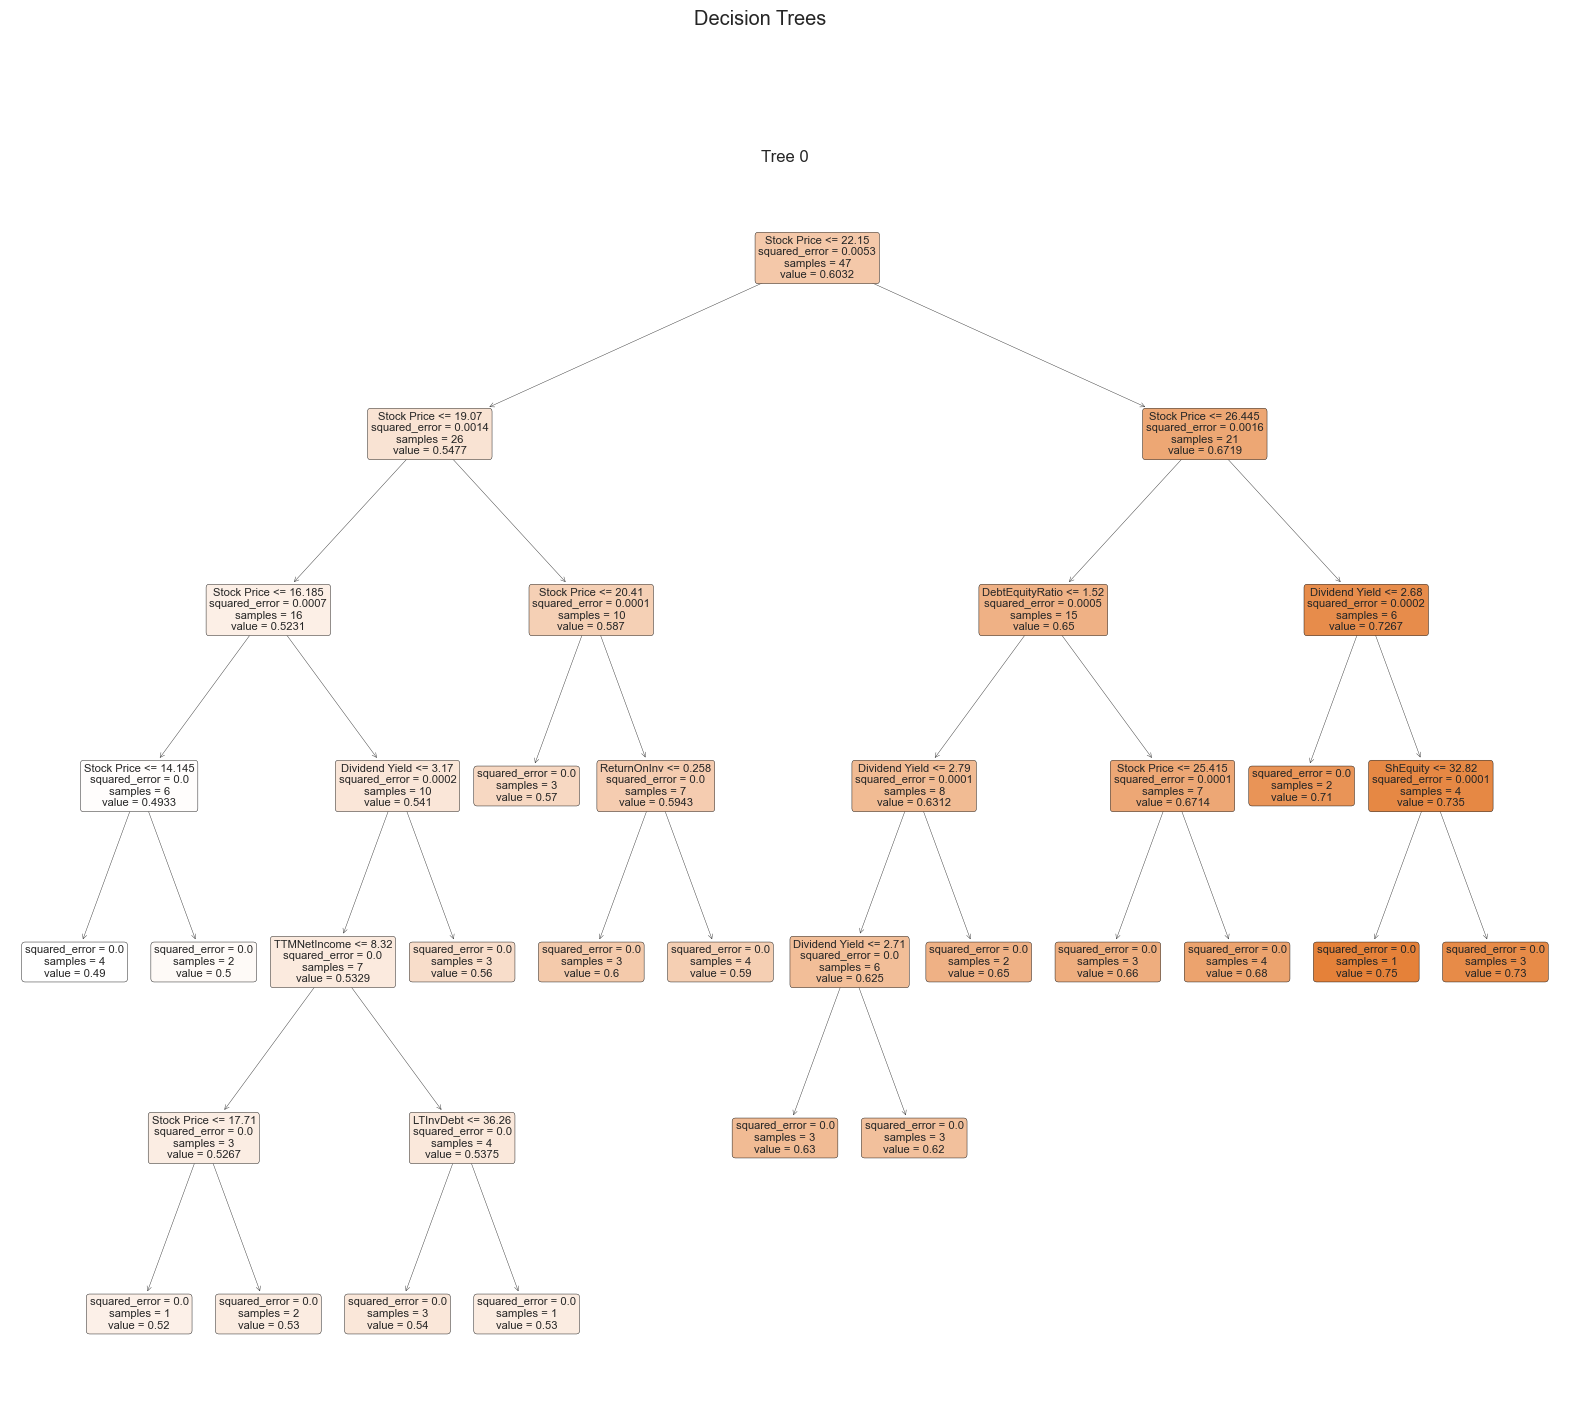

In [443]:
plot_model(tuned_dt_reg, plot = 'tree')

# <font color=red> Polynomiale regression </font>  

#### Done with RFE for feature selection:

In [423]:
y = merged_df['Dividend Payout']
X = merged_df.drop('Dividend Payout', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [424]:
X_train.head()

,LongTermDebt,ShEquity,DebtEquityRatio,TTMNetIncome,LTInvDebt,ReturnOnInv,Stock Price,Dividend Yield
294,52.520000,32.630001,1.61,10.51,49.020000,0.2197,26.61,2.65
387,56.619999,33.439999,1.69,10.23,52.590000,0.2117,27.73,2.71
102,22.639999,25.809999,0.88,8.88,30.240000,0.2967,19.44,2.95
385,56.880001,32.630001,1.74,10.63,46.810001,0.2218,27.73,2.71
199,44.669998,35.419998,1.26,8.93,46.799999,0.2289,22.97,2.81


In [425]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming you have already defined X and y

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

regression_model = LinearRegression()
rfe = RFE(regression_model, n_features_to_select=5)

rfe.fit(X_train, y_train)

selected_features_indices = rfe.support_
selected_features_names = poly.get_feature_names_out()[selected_features_indices]

X_train_selected = X_train[:, selected_features_indices]
X_test_selected = X_test[:, selected_features_indices]

regression_model.fit(X_train_selected, y_train)
y_pred = regression_model.predict(X_test_selected)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error: 0.0008417430620656041
R-squared (R2): 0.8882313934253381


# <font color=red> Support Vector Regression (SVR) </font> 

#### Done with k-best for feature selection:

In [426]:
y = merged_df['Dividend Payout']
X = merged_df.drop('Dividend Payout', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [427]:
X_train.head()

,LongTermDebt,ShEquity,DebtEquityRatio,TTMNetIncome,LTInvDebt,ReturnOnInv,Stock Price,Dividend Yield
294,52.520000,32.630001,1.61,10.51,49.020000,0.2197,26.61,2.65
387,56.619999,33.439999,1.69,10.23,52.590000,0.2117,27.73,2.71
102,22.639999,25.809999,0.88,8.88,30.240000,0.2967,19.44,2.95
385,56.880001,32.630001,1.74,10.63,46.810001,0.2218,27.73,2.71
199,44.669998,35.419998,1.26,8.93,46.799999,0.2289,22.97,2.81


In [428]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np
import pandas as pd

# Supposons que X et y sont vos caractéristiques et vos cibles respectivement
# Assurez-vous d'adapter cela à vos données spécifiques
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sélection des k meilleures fonctionnalités
k_best = SelectKBest(f_regression, k='all')  # Utiliser 'all' pour inclure toutes les fonctionnalités
X_train_selected = k_best.fit_transform(X_train, y_train)
X_test_selected = k_best.transform(X_test)

# Instancier le modèle de régression SVM
svm_regressor = SVR(kernel='linear')  # Vous pouvez choisir le noyau approprié en fonction de votre problème

# Adapter le modèle sur les données d'entraînement avec fonctionnalités sélectionnées
svm_regressor.fit(X_train_selected, y_train)

# Faire des prédictions sur les données de test avec fonctionnalités sélectionnées
y_pred = svm_regressor.predict(X_test_selected)

# Évaluer les performances du modèle avec MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Utiliser la validation croisée avec le coefficient de détermination (R2) comme métrique
r2_scorer = make_scorer(lambda y, y_pred: svm_regressor.score(X_test_selected, y_test))
cross_val_r2 = cross_val_score(svm_regressor, X_test_selected, y_test, cv=5, scoring=r2_scorer)

# Afficher la performance en utilisant R2 pour chaque pli
print("Cross-validated R2 scores:", cross_val_r2)
print("Mean R2 score:", np.mean(cross_val_r2))

Mean Squared Error: 0.005253678040710383
Cross-validated R2 scores: [0.30240438 0.30240438 0.30240438 0.30240438 0.30240438]
Mean R2 score: 0.3024043791211739


# <font color=red> Orthogonal Matching Pursuit (OMP) </font> 

#### Done with k-best for feature selection:

In [429]:
y = merged_df['Dividend Payout']
X = merged_df.drop('Dividend Payout', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [430]:
X_train.head()

,LongTermDebt,ShEquity,DebtEquityRatio,TTMNetIncome,LTInvDebt,ReturnOnInv,Stock Price,Dividend Yield
294,52.520000,32.630001,1.61,10.51,49.020000,0.2197,26.61,2.65
387,56.619999,33.439999,1.69,10.23,52.590000,0.2117,27.73,2.71
102,22.639999,25.809999,0.88,8.88,30.240000,0.2967,19.44,2.95
385,56.880001,32.630001,1.74,10.63,46.810001,0.2218,27.73,2.71
199,44.669998,35.419998,1.26,8.93,46.799999,0.2289,22.97,2.81


In [431]:
import pandas as pd
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline

# Assuming X and y are your feature matrix and target vector
X = merged_df[['LongTermDebt', 'ShEquity', 'TTMNetIncome', 'ReturnOnInv','Dividend Yield', 'Stock Price']]
y = merged_df['Dividend Payout']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with feature selection and the OMP model
pipeline = Pipeline([
    ('feature_selection', SelectKBest(f_regression, k='all')),  # Select all available features
    ('scaler', StandardScaler()),
    ('omp', OrthogonalMatchingPursuit())
])

# Fit the pipeline on the training set
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.0006754620885641578
Mean Absolute Error: 0.019343211774298756
R-squared: 0.9103105688242159


# <font color=red> K-Nearest Neighbors(KNN) </font> 

#### Done with Select K-Best  for feature selection:

In [432]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

y = merged_df['Dividend Payout']
X = merged_df.drop('Dividend Payout', axis=1) # becareful inplace= False

# Assurez-vous d'adapter cela à vos données spécifiques
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sélection des k meilleures fonctionnalités
k_best = SelectKBest(f_regression, k='all')  # Utiliser 'all' pour inclure toutes les fonctionnalités
X_train_selected = k_best.fit_transform(X_train, y_train)
X_test_selected = k_best.transform(X_test)

# Instancier le modèle de régression KNN
knn_regression = KNeighborsRegressor(n_neighbors=5)

# Adapter le modèle sur les données d'entraînement avec fonctionnalités sélectionnées
knn_regression.fit(X_train_selected, y_train)

# Faire des prédictions sur les données de test avec fonctionnalités sélectionnées
y_pred = knn_regression.predict(X_test_selected)

# Évaluer les performances du modèle, par exemple, avec MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 0.0005134285714285715
R-squared: 0.9318257570625297


In [433]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
206,0.63,0.68
96,0.54,0.63
4,0.49,0.54
9,0.50,0.63
108,0.54,0.50


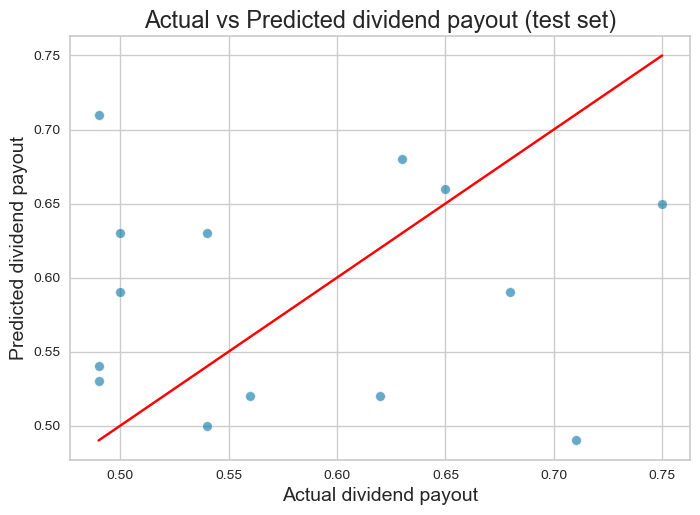

In [434]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_hat are your actual and predicted values
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(x=y_test, y=y_test, color='red')  # Specify x and y for the lineplot

plt.xlabel('Actual dividend payout', fontsize=14)
plt.ylabel('Predicted dividend payout', fontsize=14)
plt.title('Actual vs Predicted dividend payout (test set)', fontsize=17)
plt.show()

In [435]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
# Assuming X_train, X_test, y_train, y_test are defined

# Create and train the KNN regression model
knn_reg = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors)
knn_reg.fit(X_train, y_train)

# Obtain the R-squared score on the test set
score = knn_reg.score(X_test, y_test)
print(f"R-squared score: {score}")


R-squared score: 0.9318257570625297


# <font color=red> Interpretations </font> 

                   Model      MSE     R2
0                  LASSO  0.02900  0.960
1                  RIDGE  0.02900  0.964
2             ElasticNet  0.02900  0.965
3      simple regression  0.00023  0.944
4    Multiple Regression  0.00045  0.930
5                    KNN  0.00050  0.930
6                    OMP  0.00060  0.910
7                    SVR  0.00500  0.300
8  Polynomial Regression  0.00084  0.880
9          Decision Tree  0.00029  0.920


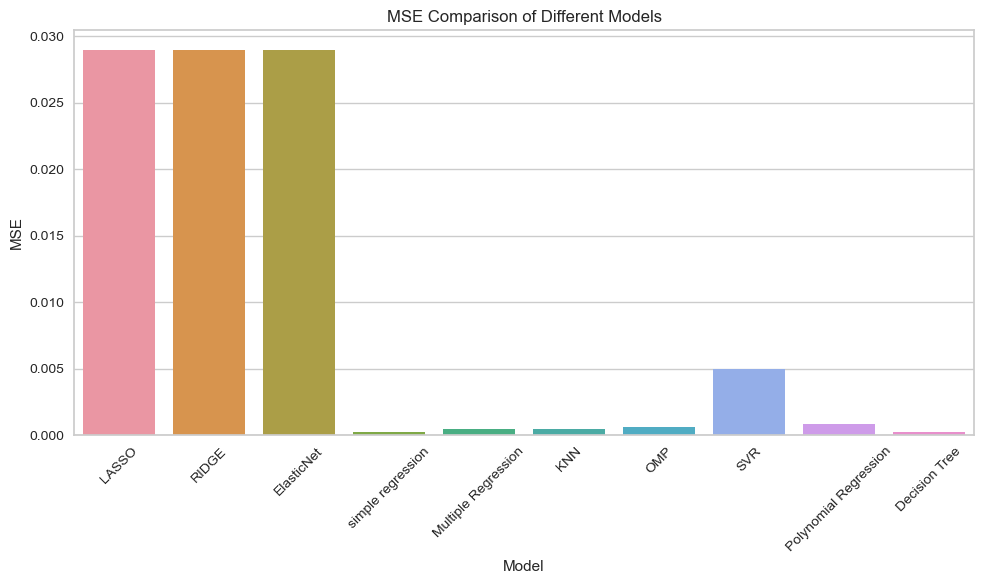

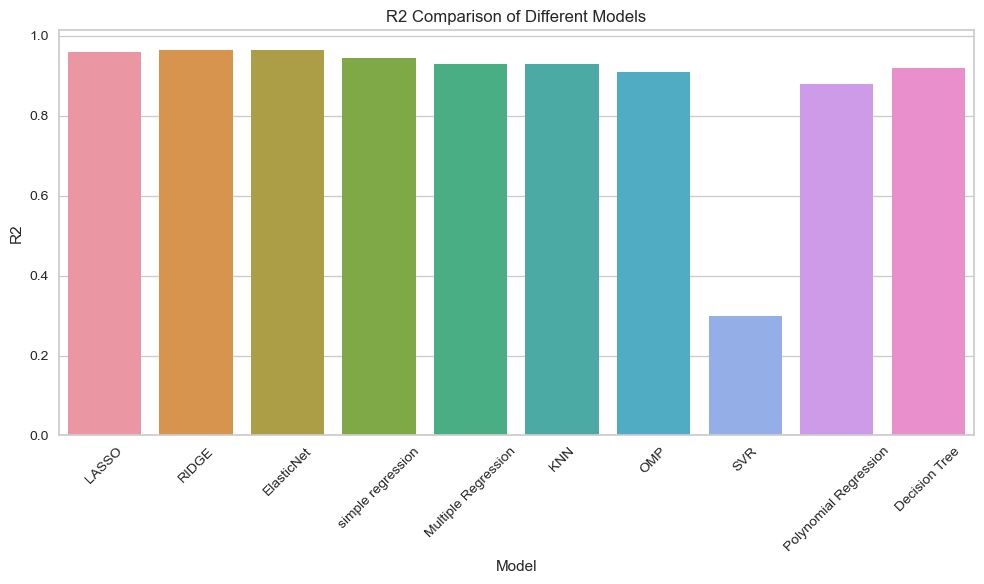

In [440]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Train all your models and store evaluation metrics in respective variables
# ... (train models and calculate metrics)

# Create a dictionary to store the metrics for each model
models_metrics = {
    'Model': ['LASSO', 'RIDGE', 'ElasticNet', 'simple regression',  
              'Multiple Regression', 'KNN', 'OMP', 'SVR', 'Polynomial Regression','Decision Tree'],
    'MSE': [0.029,0.029,0.029,  
            0.00023,0.00045,0.0005,0.0006,0.005,0.00084,0.00029],
    'R2': [0.96,0.964,0.965,0.944,  
             0.93, 0.93, 0.91, 0.30, 0.88,0.92]

}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(models_metrics)

# Display the metrics table
print(metrics_df)

# Generate a visualization for comparison (e.g., MSE comparison using seaborn)
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', data=metrics_df)
plt.xticks(rotation=45)
plt.title('MSE Comparison of Different Models')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.tight_layout()
plt.show()



# Generate a visualization for comparison (e.g., MSE comparison using seaborn)
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R2', data=metrics_df)
plt.xticks(rotation=45)
plt.title('R2 Comparison of Different Models')
plt.xlabel('Model')
plt.ylabel('R2')
plt.tight_layout()
plt.show()

In [441]:
import pandas as pd

# Your models and metrics data
models_metrics = {
    'Model': ['LASSO', 'RIDGE', 'ElasticNet', 'simple regression',  
              'Multiple Regression', 'KNN', 'OMP', 'SVR', 'Polynomial Regression','Decision Tree'],
    'MSE': [0.029,0.029,0.029,  
            0.00023,0.00045,0.0005,0.0006,0.005,0.00084,0.00029],
    'R2': [0.96,0.964,0.965,0.944,  
             0.93, 0.93, 0.91, 0.30, 0.88,0.92]
}

# Creating a DataFrame
metrics_df = pd.DataFrame(models_metrics)

# Sorting the DataFrame by 'MSE' in ascending order
sorted_df = metrics_df.sort_values(by='MSE')

# Displaying the ordered DataFrame
print(sorted_df)

                   Model      MSE     R2
3      simple regression  0.00023  0.944
9          Decision Tree  0.00029  0.920
4    Multiple Regression  0.00045  0.930
5                    KNN  0.00050  0.930
6                    OMP  0.00060  0.910
8  Polynomial Regression  0.00084  0.880
7                    SVR  0.00500  0.300
0                  LASSO  0.02900  0.960
1                  RIDGE  0.02900  0.964
2             ElasticNet  0.02900  0.965


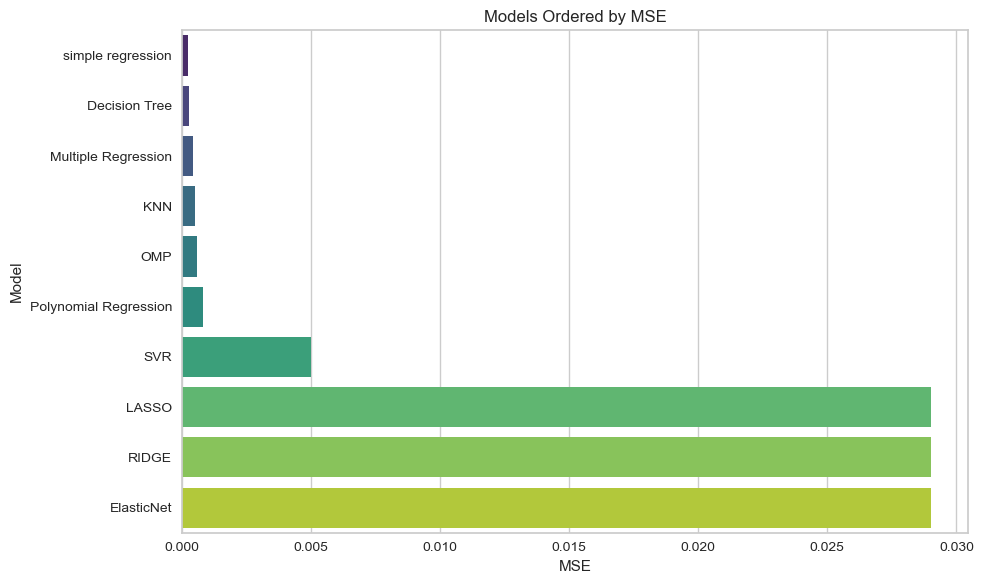

In [442]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your models and metrics data
models_metrics = {
    'Model': ['LASSO', 'RIDGE', 'ElasticNet', 'simple regression',  
              'Multiple Regression', 'KNN', 'OMP', 'SVR', 'Polynomial Regression','Decision Tree'],
    'MSE': [0.029,0.029,0.029,  
            0.00023,0.00045,0.0005,0.0006,0.005,0.00084,0.00029],
    'R2': [0.96,0.964,0.965,0.944,  
             0.93, 0.93, 0.91, 0.30, 0.88,0.92]
}

# Creating a DataFrame
metrics_df = pd.DataFrame(models_metrics)

# Sorting the DataFrame by 'MSE' in ascending order
sorted_df = metrics_df.sort_values(by='MSE')

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='MSE', y='Model', data=sorted_df, palette='viridis')
plt.title('Models Ordered by MSE')
plt.xlabel('MSE')
plt.ylabel('Model')
plt.tight_layout()
plt.show()

## Worse Model :Ridge Decision:

In the provided table, the Ridge model has an MSE of 0.02900 and an R2 of 0.964, which doesn't make it a bad model but the worst among the others in terms of MSE.

Ridge is considered one of the least favorable models for our data because:

Sensitivity to Hyperparameters: Ridge regression depends on a hyperparameter (

α) that controls the strength of regularization. If 

α is poorly tuned, it can lead to under- or over-regularization, impacting the model's performance.

Non-feature Selection: Ridge regularization typically does not select features, meaning it keeps all features in the model, even if some may not be relevant. This can result in a more complex model than necessary.

Lower Performance for Non-linear Relationships: If the relationship between features and the target variable is non-linear, Ridge might not perform as well as more flexible models capable of capturing non-linear patterns.

Dependency on Linear Assumptions: Ridge regression relies on the assumption of linearity between features and the target variable. If this assumption is not met, Ridge might not be the best choice.

Bias-Variance Trade-off: The regularization introduced by Ridge aims to reduce model variance but can introduce some bias. In some cases, a model with less regularization (e.g., simple linear regression) might have better performance in terms of the bias-variance trade-off

## Best Model :Simple linear regression:

In the initial provided table, the linear regression (Model 3) is noted to have an MSE of 0.00023 and an R2 of 0.944. These values indicate that the performance of linear regression is relatively more favorable compared to some other models in the table.

Low MSE: Linear regression has the lowest MSE among all the models. A lower MSE suggests that the model's predictions are more accurate compared to the actual values, indicating a better fit of the model to the data.

high R2:  the R2 of 0.944 is relatively high, it is higher than some other models, including Ridge Regression, LASSO, and ElasticNet. 

It is preferable to work with multiple features rather than just one, as in simple linear regression.

Sensitivity to Non-linear Data: Linear regression assumes a linear relationship between features and the target variable. If the data exhibits complex non-linear relationships, linear regression may not effectively capture these patterns. It's worth noting that your data is non-linear.

Violations of Assumptions: Linear regression relies on certain assumptions, such as linearity, independence of errors, and homoscedasticity, which can be violated in some cases. If these assumptions are not met, linear regression may produce less reliable results.

In summary, the limitations of linear regression in handling non-linear relationships and its sensitivity to the violation of assumptions might make it less suitable for your dataset. Considering models that can accommodate non-linear patterns and understanding the specific characteristics of your data is crucial for selecting an appropriate model.